I have an issue understanding how the flux is computed in Meep, and I'll try to illustrate using the following example, in which I just have a plane wave coming parallel to a surface on which I compute the flux. It's all in an empty box with PML on the sides.

In [7]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

resolution = 16
cell = mp.Vector3(12,12,0)
pml_layers = [mp.PML(thickness = 1)]
fcen = 2
source = [mp.Source(mp.ContinuousSource(fcen),
                      component=mp.Ez,
                      center=mp.Vector3(-5,0,0),
                      size=mp.Vector3(0,12,0))]

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    sources=source,
                    resolution=resolution)

The situation looks like this :

-----------
Initializing structure...
time for choose_chunkdivision = 0.000409126 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.306951 s
-----------


FloatProgress(value=0.0, description='0% done ')

run 0 finished at t = 100.0 (3200 timesteps)


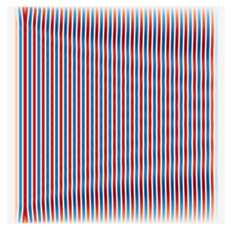

In [8]:
sim.run(until = 100)
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu')
plt.axis('off')
plt.show()

Okay, let's compute the flux through a 2x2 surface parallel to the wave at the center of the cell. Meep provides what is called in the documentation, the "Poynting flux spectrum", so this would be the flux per frequency (?).
We have to add the flux first, by indicating a center frequency, a +/- delta_f defining the zone in which meep will look for frequencies and the N_f number of frequencies it should look for. Here it's only a single frequency plane wave so delta_f = 0 and N_f = 1.

In [4]:
delta_f = 0
N_f = 1

flux = sim.add_flux(fcen, delta_f, N_f, mp.FluxRegion(center=mp.Vector3(0,0,0), size=mp.Vector3(0,2,0)))

Now let's see how the flux evolves with time :

FloatProgress(value=100.0, description='0% done ', max=101.0, min=100.0)

on time step 3200 (time=100), 0.129964 s/step
run 1 finished at t = 101.0 (3232 timesteps)


FloatProgress(value=101.0, description='0% done ', max=102.0, min=101.0)

run 2 finished at t = 102.0 (3264 timesteps)


FloatProgress(value=102.0, description='0% done ', max=103.0, min=102.0)

run 3 finished at t = 103.0 (3296 timesteps)


FloatProgress(value=103.0, description='0% done ', max=104.0, min=103.0)

run 4 finished at t = 104.0 (3328 timesteps)


FloatProgress(value=104.0, description='0% done ', max=105.0, min=104.0)

run 5 finished at t = 105.0 (3360 timesteps)


FloatProgress(value=105.0, description='0% done ', max=106.0, min=105.0)

run 6 finished at t = 106.0 (3392 timesteps)


FloatProgress(value=106.0, description='0% done ', max=107.0, min=106.0)

run 7 finished at t = 107.0 (3424 timesteps)


FloatProgress(value=107.0, description='0% done ', max=108.0, min=107.0)

run 8 finished at t = 108.0 (3456 timesteps)


FloatProgress(value=108.0, description='0% done ', max=109.0, min=108.0)

run 9 finished at t = 109.0 (3488 timesteps)


FloatProgress(value=109.0, description='0% done ', max=110.0, min=109.0)

run 10 finished at t = 110.0 (3520 timesteps)


FloatProgress(value=110.0, description='0% done ', max=111.0, min=110.0)

run 11 finished at t = 111.0 (3552 timesteps)


FloatProgress(value=111.0, description='0% done ', max=112.0, min=111.0)

run 12 finished at t = 112.0 (3584 timesteps)


FloatProgress(value=112.0, description='0% done ', max=113.0, min=112.0)

run 13 finished at t = 113.0 (3616 timesteps)


FloatProgress(value=113.0, description='0% done ', max=114.0, min=113.0)

run 14 finished at t = 114.0 (3648 timesteps)


FloatProgress(value=114.0, description='0% done ', max=115.0, min=114.0)

run 15 finished at t = 115.0 (3680 timesteps)


FloatProgress(value=115.0, description='0% done ', max=116.0, min=115.0)

run 16 finished at t = 116.0 (3712 timesteps)


FloatProgress(value=116.0, description='0% done ', max=117.0, min=116.0)

run 17 finished at t = 117.0 (3744 timesteps)


FloatProgress(value=117.0, description='0% done ', max=118.0, min=117.0)

run 18 finished at t = 118.0 (3776 timesteps)


FloatProgress(value=118.0, description='0% done ', max=119.0, min=118.0)

run 19 finished at t = 119.0 (3808 timesteps)


FloatProgress(value=119.0, description='0% done ', max=120.0, min=119.0)

run 20 finished at t = 120.0 (3840 timesteps)


FloatProgress(value=120.0, description='0% done ', max=121.0, min=120.0)

run 21 finished at t = 121.0 (3872 timesteps)


FloatProgress(value=121.0, description='0% done ', max=122.0, min=121.0)

run 22 finished at t = 122.0 (3904 timesteps)


FloatProgress(value=122.0, description='0% done ', max=123.0, min=122.0)

run 23 finished at t = 123.0 (3936 timesteps)


FloatProgress(value=123.0, description='0% done ', max=124.0, min=123.0)

run 24 finished at t = 124.0 (3968 timesteps)


FloatProgress(value=124.0, description='0% done ', max=125.0, min=124.0)

run 25 finished at t = 125.0 (4000 timesteps)


FloatProgress(value=125.0, description='0% done ', max=126.0, min=125.0)

run 26 finished at t = 126.0 (4032 timesteps)


FloatProgress(value=126.0, description='0% done ', max=127.0, min=126.0)

run 27 finished at t = 127.0 (4064 timesteps)


FloatProgress(value=127.0, description='0% done ', max=128.0, min=127.0)

run 28 finished at t = 128.0 (4096 timesteps)


FloatProgress(value=128.0, description='0% done ', max=129.0, min=128.0)

run 29 finished at t = 129.0 (4128 timesteps)


FloatProgress(value=129.0, description='0% done ', max=130.0, min=129.0)

run 30 finished at t = 130.0 (4160 timesteps)


FloatProgress(value=130.0, description='0% done ', max=131.0, min=130.0)

run 31 finished at t = 131.0 (4192 timesteps)


FloatProgress(value=131.0, description='0% done ', max=132.0, min=131.0)

run 32 finished at t = 132.0 (4224 timesteps)


FloatProgress(value=132.0, description='0% done ', max=133.0, min=132.0)

run 33 finished at t = 133.0 (4256 timesteps)


FloatProgress(value=133.0, description='0% done ', max=134.0, min=133.0)

run 34 finished at t = 134.0 (4288 timesteps)


FloatProgress(value=134.0, description='0% done ', max=135.0, min=134.0)

run 35 finished at t = 135.0 (4320 timesteps)


FloatProgress(value=135.0, description='0% done ', max=136.0, min=135.0)

run 36 finished at t = 136.0 (4352 timesteps)


FloatProgress(value=136.0, description='0% done ', max=137.0, min=136.0)

run 37 finished at t = 137.0 (4384 timesteps)


FloatProgress(value=137.0, description='0% done ', max=138.0, min=137.0)

run 38 finished at t = 138.0 (4416 timesteps)


FloatProgress(value=138.0, description='0% done ', max=139.0, min=138.0)

run 39 finished at t = 139.0 (4448 timesteps)


FloatProgress(value=139.0, description='0% done ', max=140.0, min=139.0)

run 40 finished at t = 140.0 (4480 timesteps)


FloatProgress(value=140.0, description='0% done ', max=141.0, min=140.0)

run 41 finished at t = 141.0 (4512 timesteps)


FloatProgress(value=141.0, description='0% done ', max=142.0, min=141.0)

run 42 finished at t = 142.0 (4544 timesteps)


FloatProgress(value=142.0, description='0% done ', max=143.0, min=142.0)

run 43 finished at t = 143.0 (4576 timesteps)


FloatProgress(value=143.0, description='0% done ', max=144.0, min=143.0)

run 44 finished at t = 144.0 (4608 timesteps)


FloatProgress(value=144.0, description='0% done ', max=145.0, min=144.0)

run 45 finished at t = 145.0 (4640 timesteps)


FloatProgress(value=145.0, description='0% done ', max=146.0, min=145.0)

run 46 finished at t = 146.0 (4672 timesteps)


FloatProgress(value=146.0, description='0% done ', max=147.0, min=146.0)

run 47 finished at t = 147.0 (4704 timesteps)


FloatProgress(value=147.0, description='0% done ', max=148.0, min=147.0)

run 48 finished at t = 148.0 (4736 timesteps)


FloatProgress(value=148.0, description='0% done ', max=149.0, min=148.0)

on time step 4738 (time=148.062), 0.00260529 s/step
run 49 finished at t = 149.0 (4768 timesteps)


FloatProgress(value=149.0, description='0% done ', max=150.0, min=149.0)

run 50 finished at t = 150.0 (4800 timesteps)


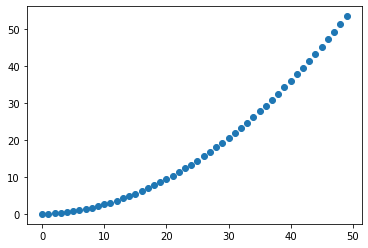

In [5]:
flux_list=[]
for k in range(50):
    sim.run(until=1)
    flux_list.append(mp.get_fluxes(flux))

plt.scatter(np.arange(50), flux_list)

So this is where things get weird for me. Why is the flux evolving this way ? Shouldn't it be at zero first and then steady one the wave reached the surface ? Okay maybe there's some integration going on, or Meep keeps adding flux to the same object, so let's just reset the flux at each step :

In [10]:
sim.reset_meep()
flux_list=[]
for k in range(50):
    flux = sim.add_flux(fcen, delta_f, N_f, mp.FluxRegion(center=mp.Vector3(0,0,0), size=mp.Vector3(0,2,0)))
    sim.run(until=1)
    flux_list.append(mp.get_fluxes(flux))

-----------
Initializing structure...
time for choose_chunkdivision = 0.000329018 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.252764 s
-----------


FloatProgress(value=0.0, description='0% done ', max=1.0)

run 201 finished at t = 1.0 (32 timesteps)


FloatProgress(value=1.0, description='0% done ', max=2.0, min=1.0)

run 202 finished at t = 2.0 (64 timesteps)


FloatProgress(value=2.0, description='0% done ', max=3.0, min=2.0)

run 203 finished at t = 3.0 (96 timesteps)


FloatProgress(value=3.0, description='0% done ', max=4.0, min=3.0)

run 204 finished at t = 4.0 (128 timesteps)


FloatProgress(value=4.0, description='0% done ', max=5.0, min=4.0)

run 205 finished at t = 5.0 (160 timesteps)


FloatProgress(value=5.0, description='0% done ', max=6.0, min=5.0)

run 206 finished at t = 6.0 (192 timesteps)


FloatProgress(value=6.0, description='0% done ', max=7.0, min=6.0)

run 207 finished at t = 7.0 (224 timesteps)


FloatProgress(value=7.0, description='0% done ', max=8.0, min=7.0)

run 208 finished at t = 8.0 (256 timesteps)


FloatProgress(value=8.0, description='0% done ', max=9.0, min=8.0)

run 209 finished at t = 9.0 (288 timesteps)


FloatProgress(value=9.0, description='0% done ', max=10.0, min=9.0)

run 210 finished at t = 10.0 (320 timesteps)


FloatProgress(value=10.0, description='0% done ', max=11.0, min=10.0)

run 211 finished at t = 11.0 (352 timesteps)


FloatProgress(value=11.0, description='0% done ', max=12.0, min=11.0)

run 212 finished at t = 12.0 (384 timesteps)


FloatProgress(value=12.0, description='0% done ', max=13.0, min=12.0)

run 213 finished at t = 13.0 (416 timesteps)


FloatProgress(value=13.0, description='0% done ', max=14.0, min=13.0)

run 214 finished at t = 14.0 (448 timesteps)


FloatProgress(value=14.0, description='0% done ', max=15.0, min=14.0)

run 215 finished at t = 15.0 (480 timesteps)


FloatProgress(value=15.0, description='0% done ', max=16.0, min=15.0)

run 216 finished at t = 16.0 (512 timesteps)


FloatProgress(value=16.0, description='0% done ', max=17.0, min=16.0)

run 217 finished at t = 17.0 (544 timesteps)


FloatProgress(value=17.0, description='0% done ', max=18.0, min=17.0)

run 218 finished at t = 18.0 (576 timesteps)


FloatProgress(value=18.0, description='0% done ', max=19.0, min=18.0)

run 219 finished at t = 19.0 (608 timesteps)


FloatProgress(value=19.0, description='0% done ', max=20.0, min=19.0)

run 220 finished at t = 20.0 (640 timesteps)


FloatProgress(value=20.0, description='0% done ', max=21.0, min=20.0)

run 221 finished at t = 21.0 (672 timesteps)


FloatProgress(value=21.0, description='0% done ', max=22.0, min=21.0)

run 222 finished at t = 22.0 (704 timesteps)


FloatProgress(value=22.0, description='0% done ', max=23.0, min=22.0)

run 223 finished at t = 23.0 (736 timesteps)


FloatProgress(value=23.0, description='0% done ', max=24.0, min=23.0)

run 224 finished at t = 24.0 (768 timesteps)


FloatProgress(value=24.0, description='0% done ', max=25.0, min=24.0)

run 225 finished at t = 25.0 (800 timesteps)


FloatProgress(value=25.0, description='0% done ', max=26.0, min=25.0)

run 226 finished at t = 26.0 (832 timesteps)


FloatProgress(value=26.0, description='0% done ', max=27.0, min=26.0)

run 227 finished at t = 27.0 (864 timesteps)


FloatProgress(value=27.0, description='0% done ', max=28.0, min=27.0)

run 228 finished at t = 28.0 (896 timesteps)


FloatProgress(value=28.0, description='0% done ', max=29.0, min=28.0)

run 229 finished at t = 29.0 (928 timesteps)


FloatProgress(value=29.0, description='0% done ', max=30.0, min=29.0)

run 230 finished at t = 30.0 (960 timesteps)


FloatProgress(value=30.0, description='0% done ', max=31.0, min=30.0)

run 231 finished at t = 31.0 (992 timesteps)


FloatProgress(value=31.0, description='0% done ', max=32.0, min=31.0)

run 232 finished at t = 32.0 (1024 timesteps)


FloatProgress(value=32.0, description='0% done ', max=33.0, min=32.0)

run 233 finished at t = 33.0 (1056 timesteps)


FloatProgress(value=33.0, description='0% done ', max=34.0, min=33.0)

run 234 finished at t = 34.0 (1088 timesteps)


FloatProgress(value=34.0, description='0% done ', max=35.0, min=34.0)

run 235 finished at t = 35.0 (1120 timesteps)


FloatProgress(value=35.0, description='0% done ', max=36.0, min=35.0)

run 236 finished at t = 36.0 (1152 timesteps)


FloatProgress(value=36.0, description='0% done ', max=37.0, min=36.0)

run 237 finished at t = 37.0 (1184 timesteps)


FloatProgress(value=37.0, description='0% done ', max=38.0, min=37.0)

run 238 finished at t = 38.0 (1216 timesteps)


FloatProgress(value=38.0, description='0% done ', max=39.0, min=38.0)

run 239 finished at t = 39.0 (1248 timesteps)


FloatProgress(value=39.0, description='0% done ', max=40.0, min=39.0)

run 240 finished at t = 40.0 (1280 timesteps)


FloatProgress(value=40.0, description='0% done ', max=41.0, min=40.0)

run 241 finished at t = 41.0 (1312 timesteps)


FloatProgress(value=41.0, description='0% done ', max=42.0, min=41.0)

run 242 finished at t = 42.0 (1344 timesteps)


FloatProgress(value=42.0, description='0% done ', max=43.0, min=42.0)

run 243 finished at t = 43.0 (1376 timesteps)


FloatProgress(value=43.0, description='0% done ', max=44.0, min=43.0)

run 244 finished at t = 44.0 (1408 timesteps)


FloatProgress(value=44.0, description='0% done ', max=45.0, min=44.0)

run 245 finished at t = 45.0 (1440 timesteps)


FloatProgress(value=45.0, description='0% done ', max=46.0, min=45.0)

run 246 finished at t = 46.0 (1472 timesteps)


FloatProgress(value=46.0, description='0% done ', max=47.0, min=46.0)

on time step 1486 (time=46.4375), 0.00269299 s/step
run 247 finished at t = 47.0 (1504 timesteps)


FloatProgress(value=47.0, description='0% done ', max=48.0, min=47.0)

run 248 finished at t = 48.0 (1536 timesteps)


FloatProgress(value=48.0, description='0% done ', max=49.0, min=48.0)

run 249 finished at t = 49.0 (1568 timesteps)


FloatProgress(value=49.0, description='0% done ', max=50.0, min=49.0)

run 250 finished at t = 50.0 (1600 timesteps)


(0.0, 0.022)

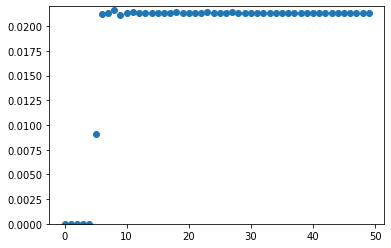

In [11]:
plt.scatter(np.arange(50), flux_list)
plt.ylim((0,0.022))

Okay so now it does look like a flux, 0 at the beginning and then just constant. But how do I know if until = 1 is the right time ? How does it change with the time steps ? 

-----------
Initializing structure...
time for choose_chunkdivision = 0.000351906 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.267926 s
-----------


FloatProgress(value=0.0, description='0% done ', max=1.0)

run 402 finished at t = 1.0 (32 timesteps)


FloatProgress(value=1.0, description='0% done ', max=2.0, min=1.0)

run 403 finished at t = 2.0 (64 timesteps)


FloatProgress(value=2.0, description='0% done ', max=3.0, min=2.0)

run 404 finished at t = 3.0 (96 timesteps)


FloatProgress(value=3.0, description='0% done ', max=4.0, min=3.0)

run 405 finished at t = 4.0 (128 timesteps)


FloatProgress(value=4.0, description='0% done ', max=5.0, min=4.0)

run 406 finished at t = 5.0 (160 timesteps)


FloatProgress(value=5.0, description='0% done ', max=6.0, min=5.0)

run 407 finished at t = 6.0 (192 timesteps)


FloatProgress(value=6.0, description='0% done ', max=7.0, min=6.0)

run 408 finished at t = 7.0 (224 timesteps)


FloatProgress(value=7.0, description='0% done ', max=8.0, min=7.0)

run 409 finished at t = 8.0 (256 timesteps)


FloatProgress(value=8.0, description='0% done ', max=9.0, min=8.0)

run 410 finished at t = 9.0 (288 timesteps)


FloatProgress(value=9.0, description='0% done ', max=10.0, min=9.0)

run 411 finished at t = 10.0 (320 timesteps)


FloatProgress(value=10.0, description='0% done ', max=11.0, min=10.0)

run 412 finished at t = 11.0 (352 timesteps)


FloatProgress(value=11.0, description='0% done ', max=12.0, min=11.0)

run 413 finished at t = 12.0 (384 timesteps)


FloatProgress(value=12.0, description='0% done ', max=13.0, min=12.0)

run 414 finished at t = 13.0 (416 timesteps)


FloatProgress(value=13.0, description='0% done ', max=14.0, min=13.0)

run 415 finished at t = 14.0 (448 timesteps)


FloatProgress(value=14.0, description='0% done ', max=15.0, min=14.0)

run 416 finished at t = 15.0 (480 timesteps)


FloatProgress(value=15.0, description='0% done ', max=16.0, min=15.0)

run 417 finished at t = 16.0 (512 timesteps)


FloatProgress(value=16.0, description='0% done ', max=17.0, min=16.0)

run 418 finished at t = 17.0 (544 timesteps)


FloatProgress(value=17.0, description='0% done ', max=18.0, min=17.0)

run 419 finished at t = 18.0 (576 timesteps)


FloatProgress(value=18.0, description='0% done ', max=19.0, min=18.0)

run 420 finished at t = 19.0 (608 timesteps)


FloatProgress(value=19.0, description='0% done ', max=20.0, min=19.0)

run 421 finished at t = 20.0 (640 timesteps)


FloatProgress(value=20.0, description='0% done ', max=21.0, min=20.0)

run 422 finished at t = 21.0 (672 timesteps)


FloatProgress(value=21.0, description='0% done ', max=22.0, min=21.0)

run 423 finished at t = 22.0 (704 timesteps)


FloatProgress(value=22.0, description='0% done ', max=23.0, min=22.0)

run 424 finished at t = 23.0 (736 timesteps)


FloatProgress(value=23.0, description='0% done ', max=24.0, min=23.0)

run 425 finished at t = 24.0 (768 timesteps)


FloatProgress(value=24.0, description='0% done ', max=25.0, min=24.0)

run 426 finished at t = 25.0 (800 timesteps)


FloatProgress(value=25.0, description='0% done ', max=26.0, min=25.0)

run 427 finished at t = 26.0 (832 timesteps)


FloatProgress(value=26.0, description='0% done ', max=27.0, min=26.0)

run 428 finished at t = 27.0 (864 timesteps)


FloatProgress(value=27.0, description='0% done ', max=28.0, min=27.0)

run 429 finished at t = 28.0 (896 timesteps)


FloatProgress(value=28.0, description='0% done ', max=29.0, min=28.0)

run 430 finished at t = 29.0 (928 timesteps)


FloatProgress(value=29.0, description='0% done ', max=30.0, min=29.0)

run 431 finished at t = 30.0 (960 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000444889 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.240356 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2.0)

run 432 finished at t = 2.0 (64 timesteps)


FloatProgress(value=2.0, description='0% done ', max=4.0, min=2.0)

run 433 finished at t = 4.0 (128 timesteps)


FloatProgress(value=4.0, description='0% done ', max=6.0, min=4.0)

run 434 finished at t = 6.0 (192 timesteps)


FloatProgress(value=6.0, description='0% done ', max=8.0, min=6.0)

run 435 finished at t = 8.0 (256 timesteps)


FloatProgress(value=8.0, description='0% done ', max=10.0, min=8.0)

run 436 finished at t = 10.0 (320 timesteps)


FloatProgress(value=10.0, description='0% done ', max=12.0, min=10.0)

run 437 finished at t = 12.0 (384 timesteps)


FloatProgress(value=12.0, description='0% done ', max=14.0, min=12.0)

run 438 finished at t = 14.0 (448 timesteps)


FloatProgress(value=14.0, description='0% done ', max=16.0, min=14.0)

run 439 finished at t = 16.0 (512 timesteps)


FloatProgress(value=16.0, description='0% done ', max=18.0, min=16.0)

run 440 finished at t = 18.0 (576 timesteps)


FloatProgress(value=18.0, description='0% done ', max=20.0, min=18.0)

run 441 finished at t = 20.0 (640 timesteps)


FloatProgress(value=20.0, description='0% done ', max=22.0, min=20.0)

run 442 finished at t = 22.0 (704 timesteps)


FloatProgress(value=22.0, description='0% done ', max=24.0, min=22.0)

run 443 finished at t = 24.0 (768 timesteps)


FloatProgress(value=24.0, description='0% done ', max=26.0, min=24.0)

run 444 finished at t = 26.0 (832 timesteps)


FloatProgress(value=26.0, description='0% done ', max=28.0, min=26.0)

run 445 finished at t = 28.0 (896 timesteps)


FloatProgress(value=28.0, description='0% done ', max=30.0, min=28.0)

run 446 finished at t = 30.0 (960 timesteps)


FloatProgress(value=30.0, description='0% done ', max=32.0, min=30.0)

run 447 finished at t = 32.0 (1024 timesteps)


FloatProgress(value=32.0, description='0% done ', max=34.0, min=32.0)

run 448 finished at t = 34.0 (1088 timesteps)


FloatProgress(value=34.0, description='0% done ', max=36.0, min=34.0)

run 449 finished at t = 36.0 (1152 timesteps)


FloatProgress(value=36.0, description='0% done ', max=38.0, min=36.0)

run 450 finished at t = 38.0 (1216 timesteps)


FloatProgress(value=38.0, description='0% done ', max=40.0, min=38.0)

run 451 finished at t = 40.0 (1280 timesteps)


FloatProgress(value=40.0, description='0% done ', max=42.0, min=40.0)

run 452 finished at t = 42.0 (1344 timesteps)


FloatProgress(value=42.0, description='0% done ', max=44.0, min=42.0)

run 453 finished at t = 44.0 (1408 timesteps)


FloatProgress(value=44.0, description='0% done ', max=46.0, min=44.0)

run 454 finished at t = 46.0 (1472 timesteps)


FloatProgress(value=46.0, description='0% done ', max=48.0, min=46.0)

run 455 finished at t = 48.0 (1536 timesteps)


FloatProgress(value=48.0, description='0% done ', max=50.0, min=48.0)

run 456 finished at t = 50.0 (1600 timesteps)


FloatProgress(value=50.0, description='0% done ', max=52.0, min=50.0)

run 457 finished at t = 52.0 (1664 timesteps)


FloatProgress(value=52.0, description='0% done ', max=54.0, min=52.0)

run 458 finished at t = 54.0 (1728 timesteps)


FloatProgress(value=54.0, description='0% done ', max=56.0, min=54.0)

run 459 finished at t = 56.0 (1792 timesteps)


FloatProgress(value=56.0, description='0% done ', max=58.0, min=56.0)

run 460 finished at t = 58.0 (1856 timesteps)


FloatProgress(value=58.0, description='0% done ', max=60.0, min=58.0)

run 461 finished at t = 60.0 (1920 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.00040102 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.235446 s
-----------


FloatProgress(value=0.0, description='0% done ', max=3.0)

run 462 finished at t = 3.0 (96 timesteps)


FloatProgress(value=3.0, description='0% done ', max=6.0, min=3.0)

run 463 finished at t = 6.0 (192 timesteps)


FloatProgress(value=6.0, description='0% done ', max=9.0, min=6.0)

run 464 finished at t = 9.0 (288 timesteps)


FloatProgress(value=9.0, description='0% done ', max=12.0, min=9.0)

run 465 finished at t = 12.0 (384 timesteps)


FloatProgress(value=12.0, description='0% done ', max=15.0, min=12.0)

run 466 finished at t = 15.0 (480 timesteps)


FloatProgress(value=15.0, description='0% done ', max=18.0, min=15.0)

run 467 finished at t = 18.0 (576 timesteps)


FloatProgress(value=18.0, description='0% done ', max=21.0, min=18.0)

run 468 finished at t = 21.0 (672 timesteps)


FloatProgress(value=21.0, description='0% done ', max=24.0, min=21.0)

run 469 finished at t = 24.0 (768 timesteps)


FloatProgress(value=24.0, description='0% done ', max=27.0, min=24.0)

run 470 finished at t = 27.0 (864 timesteps)


FloatProgress(value=27.0, description='0% done ', max=30.0, min=27.0)

run 471 finished at t = 30.0 (960 timesteps)


FloatProgress(value=30.0, description='0% done ', max=33.0, min=30.0)

run 472 finished at t = 33.0 (1056 timesteps)


FloatProgress(value=33.0, description='0% done ', max=36.0, min=33.0)

run 473 finished at t = 36.0 (1152 timesteps)


FloatProgress(value=36.0, description='0% done ', max=39.0, min=36.0)

run 474 finished at t = 39.0 (1248 timesteps)


FloatProgress(value=39.0, description='0% done ', max=42.0, min=39.0)

run 475 finished at t = 42.0 (1344 timesteps)


FloatProgress(value=42.0, description='0% done ', max=45.0, min=42.0)

run 476 finished at t = 45.0 (1440 timesteps)


FloatProgress(value=45.0, description='0% done ', max=48.0, min=45.0)

run 477 finished at t = 48.0 (1536 timesteps)


FloatProgress(value=48.0, description='0% done ', max=51.0, min=48.0)

run 478 finished at t = 51.0 (1632 timesteps)


FloatProgress(value=51.0, description='0% done ', max=54.0, min=51.0)

run 479 finished at t = 54.0 (1728 timesteps)


FloatProgress(value=54.0, description='0% done ', max=57.0, min=54.0)

run 480 finished at t = 57.0 (1824 timesteps)


FloatProgress(value=57.0, description='0% done ', max=60.0, min=57.0)

run 481 finished at t = 60.0 (1920 timesteps)


FloatProgress(value=60.0, description='0% done ', max=63.0, min=60.0)

run 482 finished at t = 63.0 (2016 timesteps)


FloatProgress(value=63.0, description='0% done ', max=66.0, min=63.0)

run 483 finished at t = 66.0 (2112 timesteps)


FloatProgress(value=66.0, description='0% done ', max=69.0, min=66.0)

run 484 finished at t = 69.0 (2208 timesteps)


FloatProgress(value=69.0, description='0% done ', max=72.0, min=69.0)

run 485 finished at t = 72.0 (2304 timesteps)


FloatProgress(value=72.0, description='0% done ', max=75.0, min=72.0)

run 486 finished at t = 75.0 (2400 timesteps)


FloatProgress(value=75.0, description='0% done ', max=78.0, min=75.0)

on time step 2459 (time=76.8438), 0.00162672 s/step
run 487 finished at t = 78.0 (2496 timesteps)


FloatProgress(value=78.0, description='0% done ', max=81.0, min=78.0)

run 488 finished at t = 81.0 (2592 timesteps)


FloatProgress(value=81.0, description='0% done ', max=84.0, min=81.0)

run 489 finished at t = 84.0 (2688 timesteps)


FloatProgress(value=84.0, description='0% done ', max=87.0, min=84.0)

run 490 finished at t = 87.0 (2784 timesteps)


FloatProgress(value=87.0, description='0% done ', max=90.0, min=87.0)

run 491 finished at t = 90.0 (2880 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000316858 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.229297 s
-----------


FloatProgress(value=0.0, description='0% done ', max=4.0)

run 492 finished at t = 4.0 (128 timesteps)


FloatProgress(value=4.0, description='0% done ', max=8.0, min=4.0)

run 493 finished at t = 8.0 (256 timesteps)


FloatProgress(value=8.0, description='0% done ', max=12.0, min=8.0)

run 494 finished at t = 12.0 (384 timesteps)


FloatProgress(value=12.0, description='0% done ', max=16.0, min=12.0)

run 495 finished at t = 16.0 (512 timesteps)


FloatProgress(value=16.0, description='0% done ', max=20.0, min=16.0)

run 496 finished at t = 20.0 (640 timesteps)


FloatProgress(value=20.0, description='0% done ', max=24.0, min=20.0)

run 497 finished at t = 24.0 (768 timesteps)


FloatProgress(value=24.0, description='0% done ', max=28.0, min=24.0)

run 498 finished at t = 28.0 (896 timesteps)


FloatProgress(value=28.0, description='0% done ', max=32.0, min=28.0)

run 499 finished at t = 32.0 (1024 timesteps)


FloatProgress(value=32.0, description='0% done ', max=36.0, min=32.0)

run 500 finished at t = 36.0 (1152 timesteps)


FloatProgress(value=36.0, description='0% done ', max=40.0, min=36.0)

run 501 finished at t = 40.0 (1280 timesteps)


FloatProgress(value=40.0, description='0% done ', max=44.0, min=40.0)

run 502 finished at t = 44.0 (1408 timesteps)


FloatProgress(value=44.0, description='0% done ', max=48.0, min=44.0)

run 503 finished at t = 48.0 (1536 timesteps)


FloatProgress(value=48.0, description='0% done ', max=52.0, min=48.0)

run 504 finished at t = 52.0 (1664 timesteps)


FloatProgress(value=52.0, description='0% done ', max=56.0, min=52.0)

run 505 finished at t = 56.0 (1792 timesteps)


FloatProgress(value=56.0, description='0% done ', max=60.0, min=56.0)

run 506 finished at t = 60.0 (1920 timesteps)


FloatProgress(value=60.0, description='0% done ', max=64.0, min=60.0)

run 507 finished at t = 64.0 (2048 timesteps)


FloatProgress(value=64.0, description='0% done ', max=68.0, min=64.0)

run 508 finished at t = 68.0 (2176 timesteps)


FloatProgress(value=68.0, description='0% done ', max=72.0, min=68.0)

run 509 finished at t = 72.0 (2304 timesteps)


FloatProgress(value=72.0, description='0% done ', max=76.0, min=72.0)

run 510 finished at t = 76.0 (2432 timesteps)


FloatProgress(value=76.0, description='0% done ', max=80.0, min=76.0)

run 511 finished at t = 80.0 (2560 timesteps)


FloatProgress(value=80.0, description='0% done ', max=84.0, min=80.0)

run 512 finished at t = 84.0 (2688 timesteps)


FloatProgress(value=84.0, description='0% done ', max=88.0, min=84.0)

run 513 finished at t = 88.0 (2816 timesteps)


FloatProgress(value=88.0, description='0% done ', max=92.0, min=88.0)

run 514 finished at t = 92.0 (2944 timesteps)


FloatProgress(value=92.0, description='0% done ', max=96.0, min=92.0)

run 515 finished at t = 96.0 (3072 timesteps)


FloatProgress(value=96.0, description='0% done ', min=96.0)

on time step 3085 (time=96.4062), 0.00129668 s/step
run 516 finished at t = 100.0 (3200 timesteps)


FloatProgress(value=100.0, description='0% done ', max=104.0, min=100.0)

run 517 finished at t = 104.0 (3328 timesteps)


FloatProgress(value=104.0, description='0% done ', max=108.0, min=104.0)

run 518 finished at t = 108.0 (3456 timesteps)


FloatProgress(value=108.0, description='0% done ', max=112.0, min=108.0)

run 519 finished at t = 112.0 (3584 timesteps)


FloatProgress(value=112.0, description='0% done ', max=116.0, min=112.0)

run 520 finished at t = 116.0 (3712 timesteps)


FloatProgress(value=116.0, description='0% done ', max=120.0, min=116.0)

run 521 finished at t = 120.0 (3840 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000339985 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.198128 s
-----------


FloatProgress(value=0.0, description='0% done ', max=5.0)

run 522 finished at t = 5.0 (160 timesteps)


FloatProgress(value=5.0, description='0% done ', max=10.0, min=5.0)

run 523 finished at t = 10.0 (320 timesteps)


FloatProgress(value=10.0, description='0% done ', max=15.0, min=10.0)

run 524 finished at t = 15.0 (480 timesteps)


FloatProgress(value=15.0, description='0% done ', max=20.0, min=15.0)

run 525 finished at t = 20.0 (640 timesteps)


FloatProgress(value=20.0, description='0% done ', max=25.0, min=20.0)

run 526 finished at t = 25.0 (800 timesteps)


FloatProgress(value=25.0, description='0% done ', max=30.0, min=25.0)

run 527 finished at t = 30.0 (960 timesteps)


FloatProgress(value=30.0, description='0% done ', max=35.0, min=30.0)

run 528 finished at t = 35.0 (1120 timesteps)


FloatProgress(value=35.0, description='0% done ', max=40.0, min=35.0)

run 529 finished at t = 40.0 (1280 timesteps)


FloatProgress(value=40.0, description='0% done ', max=45.0, min=40.0)

run 530 finished at t = 45.0 (1440 timesteps)


FloatProgress(value=45.0, description='0% done ', max=50.0, min=45.0)

run 531 finished at t = 50.0 (1600 timesteps)


FloatProgress(value=50.0, description='0% done ', max=55.0, min=50.0)

run 532 finished at t = 55.0 (1760 timesteps)


FloatProgress(value=55.0, description='0% done ', max=60.0, min=55.0)

run 533 finished at t = 60.0 (1920 timesteps)


FloatProgress(value=60.0, description='0% done ', max=65.0, min=60.0)

run 534 finished at t = 65.0 (2080 timesteps)


FloatProgress(value=65.0, description='0% done ', max=70.0, min=65.0)

run 535 finished at t = 70.0 (2240 timesteps)


FloatProgress(value=70.0, description='0% done ', max=75.0, min=70.0)

run 536 finished at t = 75.0 (2400 timesteps)


FloatProgress(value=75.0, description='0% done ', max=80.0, min=75.0)

run 537 finished at t = 80.0 (2560 timesteps)


FloatProgress(value=80.0, description='0% done ', max=85.0, min=80.0)

run 538 finished at t = 85.0 (2720 timesteps)


FloatProgress(value=85.0, description='0% done ', max=90.0, min=85.0)

run 539 finished at t = 90.0 (2880 timesteps)


FloatProgress(value=90.0, description='0% done ', max=95.0, min=90.0)

run 540 finished at t = 95.0 (3040 timesteps)


FloatProgress(value=95.0, description='0% done ', min=95.0)

run 541 finished at t = 100.0 (3200 timesteps)


FloatProgress(value=100.0, description='0% done ', max=105.0, min=100.0)

run 542 finished at t = 105.0 (3360 timesteps)


FloatProgress(value=105.0, description='0% done ', max=110.0, min=105.0)

on time step 3383 (time=105.719), 0.00118251 s/step
run 543 finished at t = 110.0 (3520 timesteps)


FloatProgress(value=110.0, description='0% done ', max=115.0, min=110.0)

run 544 finished at t = 115.0 (3680 timesteps)


FloatProgress(value=115.0, description='0% done ', max=120.0, min=115.0)

run 545 finished at t = 120.0 (3840 timesteps)


FloatProgress(value=120.0, description='0% done ', max=125.0, min=120.0)

run 546 finished at t = 125.0 (4000 timesteps)


FloatProgress(value=125.0, description='0% done ', max=130.0, min=125.0)

run 547 finished at t = 130.0 (4160 timesteps)


FloatProgress(value=130.0, description='0% done ', max=135.0, min=130.0)

run 548 finished at t = 135.0 (4320 timesteps)


FloatProgress(value=135.0, description='0% done ', max=140.0, min=135.0)

run 549 finished at t = 140.0 (4480 timesteps)


FloatProgress(value=140.0, description='0% done ', max=145.0, min=140.0)

run 550 finished at t = 145.0 (4640 timesteps)


FloatProgress(value=145.0, description='0% done ', max=150.0, min=145.0)

run 551 finished at t = 150.0 (4800 timesteps)


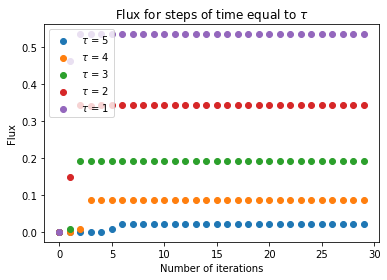

In [14]:
times = [1,2,3,4,5]
plt.figure()
for tau in times :
    list_flux = []
    for k in range(30):
        flux = sim.add_flux(fcen, delta_f, N_f, mp.FluxRegion(center=mp.Vector3(0,0,0), size=mp.Vector3(0,2,0)))
        sim.run(until = tau)
        list_flux.append(mp.get_fluxes(flux))
    plt.scatter(np.arange(30), np.array(list_flux))
    sim.reset_meep()
plt.title('Flux for steps of time equal to $ \\tau$')
plt.xlabel('Number of iterations')
plt.ylabel('Flux')
plt.legend(('$ \\tau$ = 5', '$\\tau$ = 4', '$ \\tau$ = 3', '$ \\tau$ = 2', '$ \\tau$ = 1'))
plt.show()

Okay so there is still this dependance on the simulation running time squared. Let's just check what happens when we divide by tau squared :

-----------
Initializing structure...
time for choose_chunkdivision = 0.000449896 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.249582 s
-----------


FloatProgress(value=0.0, description='0% done ', max=1.0)

run 0 finished at t = 1.0 (32 timesteps)


FloatProgress(value=1.0, description='0% done ', max=2.0, min=1.0)

run 1 finished at t = 2.0 (64 timesteps)


FloatProgress(value=2.0, description='0% done ', max=3.0, min=2.0)

run 2 finished at t = 3.0 (96 timesteps)


FloatProgress(value=3.0, description='0% done ', max=4.0, min=3.0)

run 3 finished at t = 4.0 (128 timesteps)


FloatProgress(value=4.0, description='0% done ', max=5.0, min=4.0)

run 4 finished at t = 5.0 (160 timesteps)


FloatProgress(value=5.0, description='0% done ', max=6.0, min=5.0)

run 5 finished at t = 6.0 (192 timesteps)


FloatProgress(value=6.0, description='0% done ', max=7.0, min=6.0)

run 6 finished at t = 7.0 (224 timesteps)


FloatProgress(value=7.0, description='0% done ', max=8.0, min=7.0)

run 7 finished at t = 8.0 (256 timesteps)


FloatProgress(value=8.0, description='0% done ', max=9.0, min=8.0)

run 8 finished at t = 9.0 (288 timesteps)


FloatProgress(value=9.0, description='0% done ', max=10.0, min=9.0)

run 9 finished at t = 10.0 (320 timesteps)


FloatProgress(value=10.0, description='0% done ', max=11.0, min=10.0)

run 10 finished at t = 11.0 (352 timesteps)


FloatProgress(value=11.0, description='0% done ', max=12.0, min=11.0)

run 11 finished at t = 12.0 (384 timesteps)


FloatProgress(value=12.0, description='0% done ', max=13.0, min=12.0)

run 12 finished at t = 13.0 (416 timesteps)


FloatProgress(value=13.0, description='0% done ', max=14.0, min=13.0)

run 13 finished at t = 14.0 (448 timesteps)


FloatProgress(value=14.0, description='0% done ', max=15.0, min=14.0)

run 14 finished at t = 15.0 (480 timesteps)


FloatProgress(value=15.0, description='0% done ', max=16.0, min=15.0)

run 15 finished at t = 16.0 (512 timesteps)


FloatProgress(value=16.0, description='0% done ', max=17.0, min=16.0)

run 16 finished at t = 17.0 (544 timesteps)


FloatProgress(value=17.0, description='0% done ', max=18.0, min=17.0)

run 17 finished at t = 18.0 (576 timesteps)


FloatProgress(value=18.0, description='0% done ', max=19.0, min=18.0)

run 18 finished at t = 19.0 (608 timesteps)


FloatProgress(value=19.0, description='0% done ', max=20.0, min=19.0)

run 19 finished at t = 20.0 (640 timesteps)


FloatProgress(value=20.0, description='0% done ', max=21.0, min=20.0)

run 20 finished at t = 21.0 (672 timesteps)


FloatProgress(value=21.0, description='0% done ', max=22.0, min=21.0)

run 21 finished at t = 22.0 (704 timesteps)


FloatProgress(value=22.0, description='0% done ', max=23.0, min=22.0)

run 22 finished at t = 23.0 (736 timesteps)


FloatProgress(value=23.0, description='0% done ', max=24.0, min=23.0)

run 23 finished at t = 24.0 (768 timesteps)


FloatProgress(value=24.0, description='0% done ', max=25.0, min=24.0)

run 24 finished at t = 25.0 (800 timesteps)


FloatProgress(value=25.0, description='0% done ', max=26.0, min=25.0)

run 25 finished at t = 26.0 (832 timesteps)


FloatProgress(value=26.0, description='0% done ', max=27.0, min=26.0)

run 26 finished at t = 27.0 (864 timesteps)


FloatProgress(value=27.0, description='0% done ', max=28.0, min=27.0)

run 27 finished at t = 28.0 (896 timesteps)


FloatProgress(value=28.0, description='0% done ', max=29.0, min=28.0)

run 28 finished at t = 29.0 (928 timesteps)


FloatProgress(value=29.0, description='0% done ', max=30.0, min=29.0)

run 29 finished at t = 30.0 (960 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000389099 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.294142 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2.0)

run 30 finished at t = 2.0 (64 timesteps)


FloatProgress(value=2.0, description='0% done ', max=4.0, min=2.0)

run 31 finished at t = 4.0 (128 timesteps)


FloatProgress(value=4.0, description='0% done ', max=6.0, min=4.0)

run 32 finished at t = 6.0 (192 timesteps)


FloatProgress(value=6.0, description='0% done ', max=8.0, min=6.0)

run 33 finished at t = 8.0 (256 timesteps)


FloatProgress(value=8.0, description='0% done ', max=10.0, min=8.0)

run 34 finished at t = 10.0 (320 timesteps)


FloatProgress(value=10.0, description='0% done ', max=12.0, min=10.0)

run 35 finished at t = 12.0 (384 timesteps)


FloatProgress(value=12.0, description='0% done ', max=14.0, min=12.0)

run 36 finished at t = 14.0 (448 timesteps)


FloatProgress(value=14.0, description='0% done ', max=16.0, min=14.0)

run 37 finished at t = 16.0 (512 timesteps)


FloatProgress(value=16.0, description='0% done ', max=18.0, min=16.0)

run 38 finished at t = 18.0 (576 timesteps)


FloatProgress(value=18.0, description='0% done ', max=20.0, min=18.0)

run 39 finished at t = 20.0 (640 timesteps)


FloatProgress(value=20.0, description='0% done ', max=22.0, min=20.0)

run 40 finished at t = 22.0 (704 timesteps)


FloatProgress(value=22.0, description='0% done ', max=24.0, min=22.0)

run 41 finished at t = 24.0 (768 timesteps)


FloatProgress(value=24.0, description='0% done ', max=26.0, min=24.0)

run 42 finished at t = 26.0 (832 timesteps)


FloatProgress(value=26.0, description='0% done ', max=28.0, min=26.0)

run 43 finished at t = 28.0 (896 timesteps)


FloatProgress(value=28.0, description='0% done ', max=30.0, min=28.0)

run 44 finished at t = 30.0 (960 timesteps)


FloatProgress(value=30.0, description='0% done ', max=32.0, min=30.0)

run 45 finished at t = 32.0 (1024 timesteps)


FloatProgress(value=32.0, description='0% done ', max=34.0, min=32.0)

run 46 finished at t = 34.0 (1088 timesteps)


FloatProgress(value=34.0, description='0% done ', max=36.0, min=34.0)

run 47 finished at t = 36.0 (1152 timesteps)


FloatProgress(value=36.0, description='0% done ', max=38.0, min=36.0)

run 48 finished at t = 38.0 (1216 timesteps)


FloatProgress(value=38.0, description='0% done ', max=40.0, min=38.0)

run 49 finished at t = 40.0 (1280 timesteps)


FloatProgress(value=40.0, description='0% done ', max=42.0, min=40.0)

run 50 finished at t = 42.0 (1344 timesteps)


FloatProgress(value=42.0, description='0% done ', max=44.0, min=42.0)

run 51 finished at t = 44.0 (1408 timesteps)


FloatProgress(value=44.0, description='0% done ', max=46.0, min=44.0)

run 52 finished at t = 46.0 (1472 timesteps)


FloatProgress(value=46.0, description='0% done ', max=48.0, min=46.0)

run 53 finished at t = 48.0 (1536 timesteps)


FloatProgress(value=48.0, description='0% done ', max=50.0, min=48.0)

run 54 finished at t = 50.0 (1600 timesteps)


FloatProgress(value=50.0, description='0% done ', max=52.0, min=50.0)

run 55 finished at t = 52.0 (1664 timesteps)


FloatProgress(value=52.0, description='0% done ', max=54.0, min=52.0)

run 56 finished at t = 54.0 (1728 timesteps)


FloatProgress(value=54.0, description='0% done ', max=56.0, min=54.0)

run 57 finished at t = 56.0 (1792 timesteps)


FloatProgress(value=56.0, description='0% done ', max=58.0, min=56.0)

run 58 finished at t = 58.0 (1856 timesteps)


FloatProgress(value=58.0, description='0% done ', max=60.0, min=58.0)

run 59 finished at t = 60.0 (1920 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000334978 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.197771 s
-----------


FloatProgress(value=0.0, description='0% done ', max=3.0)

run 60 finished at t = 3.0 (96 timesteps)


FloatProgress(value=3.0, description='0% done ', max=6.0, min=3.0)

run 61 finished at t = 6.0 (192 timesteps)


FloatProgress(value=6.0, description='0% done ', max=9.0, min=6.0)

run 62 finished at t = 9.0 (288 timesteps)


FloatProgress(value=9.0, description='0% done ', max=12.0, min=9.0)

run 63 finished at t = 12.0 (384 timesteps)


FloatProgress(value=12.0, description='0% done ', max=15.0, min=12.0)

run 64 finished at t = 15.0 (480 timesteps)


FloatProgress(value=15.0, description='0% done ', max=18.0, min=15.0)

run 65 finished at t = 18.0 (576 timesteps)


FloatProgress(value=18.0, description='0% done ', max=21.0, min=18.0)

run 66 finished at t = 21.0 (672 timesteps)


FloatProgress(value=21.0, description='0% done ', max=24.0, min=21.0)

run 67 finished at t = 24.0 (768 timesteps)


FloatProgress(value=24.0, description='0% done ', max=27.0, min=24.0)

run 68 finished at t = 27.0 (864 timesteps)


FloatProgress(value=27.0, description='0% done ', max=30.0, min=27.0)

run 69 finished at t = 30.0 (960 timesteps)


FloatProgress(value=30.0, description='0% done ', max=33.0, min=30.0)

run 70 finished at t = 33.0 (1056 timesteps)


FloatProgress(value=33.0, description='0% done ', max=36.0, min=33.0)

run 71 finished at t = 36.0 (1152 timesteps)


FloatProgress(value=36.0, description='0% done ', max=39.0, min=36.0)

run 72 finished at t = 39.0 (1248 timesteps)


FloatProgress(value=39.0, description='0% done ', max=42.0, min=39.0)

run 73 finished at t = 42.0 (1344 timesteps)


FloatProgress(value=42.0, description='0% done ', max=45.0, min=42.0)

run 74 finished at t = 45.0 (1440 timesteps)


FloatProgress(value=45.0, description='0% done ', max=48.0, min=45.0)

run 75 finished at t = 48.0 (1536 timesteps)


FloatProgress(value=48.0, description='0% done ', max=51.0, min=48.0)

run 76 finished at t = 51.0 (1632 timesteps)


FloatProgress(value=51.0, description='0% done ', max=54.0, min=51.0)

run 77 finished at t = 54.0 (1728 timesteps)


FloatProgress(value=54.0, description='0% done ', max=57.0, min=54.0)

run 78 finished at t = 57.0 (1824 timesteps)


FloatProgress(value=57.0, description='0% done ', max=60.0, min=57.0)

run 79 finished at t = 60.0 (1920 timesteps)


FloatProgress(value=60.0, description='0% done ', max=63.0, min=60.0)

run 80 finished at t = 63.0 (2016 timesteps)


FloatProgress(value=63.0, description='0% done ', max=66.0, min=63.0)

run 81 finished at t = 66.0 (2112 timesteps)


FloatProgress(value=66.0, description='0% done ', max=69.0, min=66.0)

run 82 finished at t = 69.0 (2208 timesteps)


FloatProgress(value=69.0, description='0% done ', max=72.0, min=69.0)

run 83 finished at t = 72.0 (2304 timesteps)


FloatProgress(value=72.0, description='0% done ', max=75.0, min=72.0)

run 84 finished at t = 75.0 (2400 timesteps)


FloatProgress(value=75.0, description='0% done ', max=78.0, min=75.0)

run 85 finished at t = 78.0 (2496 timesteps)


FloatProgress(value=78.0, description='0% done ', max=81.0, min=78.0)

run 86 finished at t = 81.0 (2592 timesteps)


FloatProgress(value=81.0, description='0% done ', max=84.0, min=81.0)

run 87 finished at t = 84.0 (2688 timesteps)


FloatProgress(value=84.0, description='0% done ', max=87.0, min=84.0)

run 88 finished at t = 87.0 (2784 timesteps)


FloatProgress(value=87.0, description='0% done ', max=90.0, min=87.0)

run 89 finished at t = 90.0 (2880 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000355005 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.207906 s
-----------


FloatProgress(value=0.0, description='0% done ', max=4.0)

run 90 finished at t = 4.0 (128 timesteps)


FloatProgress(value=4.0, description='0% done ', max=8.0, min=4.0)

run 91 finished at t = 8.0 (256 timesteps)


FloatProgress(value=8.0, description='0% done ', max=12.0, min=8.0)

run 92 finished at t = 12.0 (384 timesteps)


FloatProgress(value=12.0, description='0% done ', max=16.0, min=12.0)

run 93 finished at t = 16.0 (512 timesteps)


FloatProgress(value=16.0, description='0% done ', max=20.0, min=16.0)

run 94 finished at t = 20.0 (640 timesteps)


FloatProgress(value=20.0, description='0% done ', max=24.0, min=20.0)

run 95 finished at t = 24.0 (768 timesteps)


FloatProgress(value=24.0, description='0% done ', max=28.0, min=24.0)

run 96 finished at t = 28.0 (896 timesteps)


FloatProgress(value=28.0, description='0% done ', max=32.0, min=28.0)

run 97 finished at t = 32.0 (1024 timesteps)


FloatProgress(value=32.0, description='0% done ', max=36.0, min=32.0)

run 98 finished at t = 36.0 (1152 timesteps)


FloatProgress(value=36.0, description='0% done ', max=40.0, min=36.0)

run 99 finished at t = 40.0 (1280 timesteps)


FloatProgress(value=40.0, description='0% done ', max=44.0, min=40.0)

run 100 finished at t = 44.0 (1408 timesteps)


FloatProgress(value=44.0, description='0% done ', max=48.0, min=44.0)

run 101 finished at t = 48.0 (1536 timesteps)


FloatProgress(value=48.0, description='0% done ', max=52.0, min=48.0)

run 102 finished at t = 52.0 (1664 timesteps)


FloatProgress(value=52.0, description='0% done ', max=56.0, min=52.0)

run 103 finished at t = 56.0 (1792 timesteps)


FloatProgress(value=56.0, description='0% done ', max=60.0, min=56.0)

run 104 finished at t = 60.0 (1920 timesteps)


FloatProgress(value=60.0, description='0% done ', max=64.0, min=60.0)

run 105 finished at t = 64.0 (2048 timesteps)


FloatProgress(value=64.0, description='0% done ', max=68.0, min=64.0)

run 106 finished at t = 68.0 (2176 timesteps)


FloatProgress(value=68.0, description='0% done ', max=72.0, min=68.0)

run 107 finished at t = 72.0 (2304 timesteps)


FloatProgress(value=72.0, description='0% done ', max=76.0, min=72.0)

run 108 finished at t = 76.0 (2432 timesteps)


FloatProgress(value=76.0, description='0% done ', max=80.0, min=76.0)

run 109 finished at t = 80.0 (2560 timesteps)


FloatProgress(value=80.0, description='0% done ', max=84.0, min=80.0)

run 110 finished at t = 84.0 (2688 timesteps)


FloatProgress(value=84.0, description='0% done ', max=88.0, min=84.0)

run 111 finished at t = 88.0 (2816 timesteps)


FloatProgress(value=88.0, description='0% done ', max=92.0, min=88.0)

run 112 finished at t = 92.0 (2944 timesteps)


FloatProgress(value=92.0, description='0% done ', max=96.0, min=92.0)

run 113 finished at t = 96.0 (3072 timesteps)


FloatProgress(value=96.0, description='0% done ', min=96.0)

run 114 finished at t = 100.0 (3200 timesteps)


FloatProgress(value=100.0, description='0% done ', max=104.0, min=100.0)

on time step 3256 (time=101.75), 0.00122861 s/step
run 115 finished at t = 104.0 (3328 timesteps)


FloatProgress(value=104.0, description='0% done ', max=108.0, min=104.0)

run 116 finished at t = 108.0 (3456 timesteps)


FloatProgress(value=108.0, description='0% done ', max=112.0, min=108.0)

run 117 finished at t = 112.0 (3584 timesteps)


FloatProgress(value=112.0, description='0% done ', max=116.0, min=112.0)

run 118 finished at t = 116.0 (3712 timesteps)


FloatProgress(value=116.0, description='0% done ', max=120.0, min=116.0)

run 119 finished at t = 120.0 (3840 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000311136 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.205184 s
-----------


FloatProgress(value=0.0, description='0% done ', max=5.0)

run 120 finished at t = 5.0 (160 timesteps)


FloatProgress(value=5.0, description='0% done ', max=10.0, min=5.0)

run 121 finished at t = 10.0 (320 timesteps)


FloatProgress(value=10.0, description='0% done ', max=15.0, min=10.0)

run 122 finished at t = 15.0 (480 timesteps)


FloatProgress(value=15.0, description='0% done ', max=20.0, min=15.0)

run 123 finished at t = 20.0 (640 timesteps)


FloatProgress(value=20.0, description='0% done ', max=25.0, min=20.0)

run 124 finished at t = 25.0 (800 timesteps)


FloatProgress(value=25.0, description='0% done ', max=30.0, min=25.0)

run 125 finished at t = 30.0 (960 timesteps)


FloatProgress(value=30.0, description='0% done ', max=35.0, min=30.0)

run 126 finished at t = 35.0 (1120 timesteps)


FloatProgress(value=35.0, description='0% done ', max=40.0, min=35.0)

run 127 finished at t = 40.0 (1280 timesteps)


FloatProgress(value=40.0, description='0% done ', max=45.0, min=40.0)

run 128 finished at t = 45.0 (1440 timesteps)


FloatProgress(value=45.0, description='0% done ', max=50.0, min=45.0)

run 129 finished at t = 50.0 (1600 timesteps)


FloatProgress(value=50.0, description='0% done ', max=55.0, min=50.0)

run 130 finished at t = 55.0 (1760 timesteps)


FloatProgress(value=55.0, description='0% done ', max=60.0, min=55.0)

run 131 finished at t = 60.0 (1920 timesteps)


FloatProgress(value=60.0, description='0% done ', max=65.0, min=60.0)

run 132 finished at t = 65.0 (2080 timesteps)


FloatProgress(value=65.0, description='0% done ', max=70.0, min=65.0)

run 133 finished at t = 70.0 (2240 timesteps)


FloatProgress(value=70.0, description='0% done ', max=75.0, min=70.0)

run 134 finished at t = 75.0 (2400 timesteps)


FloatProgress(value=75.0, description='0% done ', max=80.0, min=75.0)

run 135 finished at t = 80.0 (2560 timesteps)


FloatProgress(value=80.0, description='0% done ', max=85.0, min=80.0)

run 136 finished at t = 85.0 (2720 timesteps)


FloatProgress(value=85.0, description='0% done ', max=90.0, min=85.0)

run 137 finished at t = 90.0 (2880 timesteps)


FloatProgress(value=90.0, description='0% done ', max=95.0, min=90.0)

run 138 finished at t = 95.0 (3040 timesteps)


FloatProgress(value=95.0, description='0% done ', min=95.0)

run 139 finished at t = 100.0 (3200 timesteps)


FloatProgress(value=100.0, description='0% done ', max=105.0, min=100.0)

run 140 finished at t = 105.0 (3360 timesteps)


FloatProgress(value=105.0, description='0% done ', max=110.0, min=105.0)

run 141 finished at t = 110.0 (3520 timesteps)


FloatProgress(value=110.0, description='0% done ', max=115.0, min=110.0)

on time step 3523 (time=110.094), 0.00113566 s/step
run 142 finished at t = 115.0 (3680 timesteps)


FloatProgress(value=115.0, description='0% done ', max=120.0, min=115.0)

run 143 finished at t = 120.0 (3840 timesteps)


FloatProgress(value=120.0, description='0% done ', max=125.0, min=120.0)

run 144 finished at t = 125.0 (4000 timesteps)


FloatProgress(value=125.0, description='0% done ', max=130.0, min=125.0)

run 145 finished at t = 130.0 (4160 timesteps)


FloatProgress(value=130.0, description='0% done ', max=135.0, min=130.0)

run 146 finished at t = 135.0 (4320 timesteps)


FloatProgress(value=135.0, description='0% done ', max=140.0, min=135.0)

run 147 finished at t = 140.0 (4480 timesteps)


FloatProgress(value=140.0, description='0% done ', max=145.0, min=140.0)

run 148 finished at t = 145.0 (4640 timesteps)


FloatProgress(value=145.0, description='0% done ', max=150.0, min=145.0)

run 149 finished at t = 150.0 (4800 timesteps)


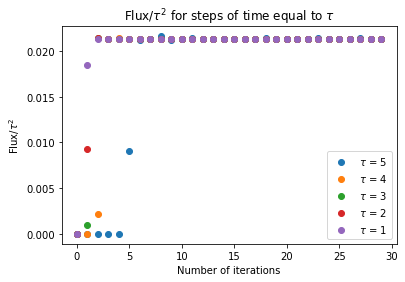

In [5]:
times = [1,2,3,4,5]
plt.figure()
for tau in times :
    list_flux = []
    for k in range(30):
        flux = sim.add_flux(fcen, delta_f, N_f, mp.FluxRegion(center=mp.Vector3(0,0,0), size=mp.Vector3(0,2,0)))
        sim.run(until = tau)
        list_flux.append(mp.get_fluxes(flux))
    plt.scatter(np.arange(30), np.array(list_flux)/tau**2)
    sim.reset_meep()
plt.title('Flux/$ \\tau^2$ for steps of time equal to $ \\tau$')
plt.xlabel('Number of iterations')
plt.ylabel('Flux/$ \\tau^2$')
plt.legend(('$ \\tau$ = 5', '$\\tau$ = 4', '$ \\tau$ = 3', '$ \\tau$ = 2', '$ \\tau$ = 1'))
plt.show()

This is what we should get (according to me, so maybe I am just mistaken).
Now let's compare Meep's flux divided by sim time squared to a hand computation of the poynting flux using the E and H fields. We can compute :
- $E^2$
- $\frac{E \times H}{2}$

And integrate it over the source. 

In [47]:
sim.reset_meep()
e2flux_list=[]
flux_meep=[]
flux_exh=[]
N_iter = 200
tau = .5
for k in range(N_iter):
    flux = sim.add_flux(fcen, delta_f, N_f, mp.FluxRegion(center=mp.Vector3(0,0,0), size=mp.Vector3(0,2,0)))
    sim.run(until = tau)
    ez_data = sim.get_array(center=mp.Vector3(), size=mp.Vector3(0,2), component=mp.Ez)
    hy_data = sim.get_array(center=mp.Vector3(), size=mp.Vector3(0,2), component=mp.Hy)

    P2 = ez_data*hy_data/2
    flux_E2 = np.sum(ez_data**2/2)
    flux_poynt = np.sum(P2)/2
    e2flux_list.append(flux_E2)
    flux_meep.append(mp.get_fluxes(flux))
    flux_exh.append(flux_poynt)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00035882 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.251261 s
-----------


FloatProgress(value=0.0, description='0% done ', max=0.5)

run 3461 finished at t = 0.5 (16 timesteps)


FloatProgress(value=0.5, description='0% done ', max=1.0, min=0.5)

run 3462 finished at t = 1.0 (32 timesteps)


FloatProgress(value=1.0, description='0% done ', max=1.5, min=1.0)

run 3463 finished at t = 1.5 (48 timesteps)


FloatProgress(value=1.5, description='0% done ', max=2.0, min=1.5)

run 3464 finished at t = 2.0 (64 timesteps)


FloatProgress(value=2.0, description='0% done ', max=2.5, min=2.0)

run 3465 finished at t = 2.5 (80 timesteps)


FloatProgress(value=2.5, description='0% done ', max=3.0, min=2.5)

run 3466 finished at t = 3.0 (96 timesteps)


FloatProgress(value=3.0, description='0% done ', max=3.5, min=3.0)

run 3467 finished at t = 3.5 (112 timesteps)


FloatProgress(value=3.5, description='0% done ', max=4.0, min=3.5)

run 3468 finished at t = 4.0 (128 timesteps)


FloatProgress(value=4.0, description='0% done ', max=4.5, min=4.0)

run 3469 finished at t = 4.5 (144 timesteps)


FloatProgress(value=4.5, description='0% done ', max=5.0, min=4.5)

run 3470 finished at t = 5.0 (160 timesteps)


FloatProgress(value=5.0, description='0% done ', max=5.5, min=5.0)

run 3471 finished at t = 5.5 (176 timesteps)


FloatProgress(value=5.5, description='0% done ', max=6.0, min=5.5)

run 3472 finished at t = 6.0 (192 timesteps)


FloatProgress(value=6.0, description='0% done ', max=6.5, min=6.0)

run 3473 finished at t = 6.5 (208 timesteps)


FloatProgress(value=6.5, description='0% done ', max=7.0, min=6.5)

run 3474 finished at t = 7.0 (224 timesteps)


FloatProgress(value=7.0, description='0% done ', max=7.5, min=7.0)

run 3475 finished at t = 7.5 (240 timesteps)


FloatProgress(value=7.5, description='0% done ', max=8.0, min=7.5)

run 3476 finished at t = 8.0 (256 timesteps)


FloatProgress(value=8.0, description='0% done ', max=8.5, min=8.0)

run 3477 finished at t = 8.5 (272 timesteps)


FloatProgress(value=8.5, description='0% done ', max=9.0, min=8.5)

run 3478 finished at t = 9.0 (288 timesteps)


FloatProgress(value=9.0, description='0% done ', max=9.5, min=9.0)

run 3479 finished at t = 9.5 (304 timesteps)


FloatProgress(value=9.5, description='0% done ', max=10.0, min=9.5)

run 3480 finished at t = 10.0 (320 timesteps)


FloatProgress(value=10.0, description='0% done ', max=10.5, min=10.0)

run 3481 finished at t = 10.5 (336 timesteps)


FloatProgress(value=10.5, description='0% done ', max=11.0, min=10.5)

run 3482 finished at t = 11.0 (352 timesteps)


FloatProgress(value=11.0, description='0% done ', max=11.5, min=11.0)

run 3483 finished at t = 11.5 (368 timesteps)


FloatProgress(value=11.5, description='0% done ', max=12.0, min=11.5)

run 3484 finished at t = 12.0 (384 timesteps)


FloatProgress(value=12.0, description='0% done ', max=12.5, min=12.0)

run 3485 finished at t = 12.5 (400 timesteps)


FloatProgress(value=12.5, description='0% done ', max=13.0, min=12.5)

run 3486 finished at t = 13.0 (416 timesteps)


FloatProgress(value=13.0, description='0% done ', max=13.5, min=13.0)

run 3487 finished at t = 13.5 (432 timesteps)


FloatProgress(value=13.5, description='0% done ', max=14.0, min=13.5)

run 3488 finished at t = 14.0 (448 timesteps)


FloatProgress(value=14.0, description='0% done ', max=14.5, min=14.0)

run 3489 finished at t = 14.5 (464 timesteps)


FloatProgress(value=14.5, description='0% done ', max=15.0, min=14.5)

run 3490 finished at t = 15.0 (480 timesteps)


FloatProgress(value=15.0, description='0% done ', max=15.5, min=15.0)

run 3491 finished at t = 15.5 (496 timesteps)


FloatProgress(value=15.5, description='0% done ', max=16.0, min=15.5)

run 3492 finished at t = 16.0 (512 timesteps)


FloatProgress(value=16.0, description='0% done ', max=16.5, min=16.0)

run 3493 finished at t = 16.5 (528 timesteps)


FloatProgress(value=16.5, description='0% done ', max=17.0, min=16.5)

run 3494 finished at t = 17.0 (544 timesteps)


FloatProgress(value=17.0, description='0% done ', max=17.5, min=17.0)

run 3495 finished at t = 17.5 (560 timesteps)


FloatProgress(value=17.5, description='0% done ', max=18.0, min=17.5)

run 3496 finished at t = 18.0 (576 timesteps)


FloatProgress(value=18.0, description='0% done ', max=18.5, min=18.0)

run 3497 finished at t = 18.5 (592 timesteps)


FloatProgress(value=18.5, description='0% done ', max=19.0, min=18.5)

run 3498 finished at t = 19.0 (608 timesteps)


FloatProgress(value=19.0, description='0% done ', max=19.5, min=19.0)

run 3499 finished at t = 19.5 (624 timesteps)


FloatProgress(value=19.5, description='0% done ', max=20.0, min=19.5)

run 3500 finished at t = 20.0 (640 timesteps)


FloatProgress(value=20.0, description='0% done ', max=20.5, min=20.0)

run 3501 finished at t = 20.5 (656 timesteps)


FloatProgress(value=20.5, description='0% done ', max=21.0, min=20.5)

run 3502 finished at t = 21.0 (672 timesteps)


FloatProgress(value=21.0, description='0% done ', max=21.5, min=21.0)

run 3503 finished at t = 21.5 (688 timesteps)


FloatProgress(value=21.5, description='0% done ', max=22.0, min=21.5)

run 3504 finished at t = 22.0 (704 timesteps)


FloatProgress(value=22.0, description='0% done ', max=22.5, min=22.0)

run 3505 finished at t = 22.5 (720 timesteps)


FloatProgress(value=22.5, description='0% done ', max=23.0, min=22.5)

run 3506 finished at t = 23.0 (736 timesteps)


FloatProgress(value=23.0, description='0% done ', max=23.5, min=23.0)

run 3507 finished at t = 23.5 (752 timesteps)


FloatProgress(value=23.5, description='0% done ', max=24.0, min=23.5)

run 3508 finished at t = 24.0 (768 timesteps)


FloatProgress(value=24.0, description='0% done ', max=24.5, min=24.0)

run 3509 finished at t = 24.5 (784 timesteps)


FloatProgress(value=24.5, description='0% done ', max=25.0, min=24.5)

run 3510 finished at t = 25.0 (800 timesteps)


FloatProgress(value=25.0, description='0% done ', max=25.5, min=25.0)

run 3511 finished at t = 25.5 (816 timesteps)


FloatProgress(value=25.5, description='0% done ', max=26.0, min=25.5)

run 3512 finished at t = 26.0 (832 timesteps)


FloatProgress(value=26.0, description='0% done ', max=26.5, min=26.0)

run 3513 finished at t = 26.5 (848 timesteps)


FloatProgress(value=26.5, description='0% done ', max=27.0, min=26.5)

run 3514 finished at t = 27.0 (864 timesteps)


FloatProgress(value=27.0, description='0% done ', max=27.5, min=27.0)

run 3515 finished at t = 27.5 (880 timesteps)


FloatProgress(value=27.5, description='0% done ', max=28.0, min=27.5)

run 3516 finished at t = 28.0 (896 timesteps)


FloatProgress(value=28.0, description='0% done ', max=28.5, min=28.0)

run 3517 finished at t = 28.5 (912 timesteps)


FloatProgress(value=28.5, description='0% done ', max=29.0, min=28.5)

run 3518 finished at t = 29.0 (928 timesteps)


FloatProgress(value=29.0, description='0% done ', max=29.5, min=29.0)

run 3519 finished at t = 29.5 (944 timesteps)


FloatProgress(value=29.5, description='0% done ', max=30.0, min=29.5)

run 3520 finished at t = 30.0 (960 timesteps)


FloatProgress(value=30.0, description='0% done ', max=30.5, min=30.0)

run 3521 finished at t = 30.5 (976 timesteps)


FloatProgress(value=30.5, description='0% done ', max=31.0, min=30.5)

run 3522 finished at t = 31.0 (992 timesteps)


FloatProgress(value=31.0, description='0% done ', max=31.5, min=31.0)

run 3523 finished at t = 31.5 (1008 timesteps)


FloatProgress(value=31.5, description='0% done ', max=32.0, min=31.5)

on time step 1008 (time=31.5), 0.00399031 s/step
run 3524 finished at t = 32.0 (1024 timesteps)


FloatProgress(value=32.0, description='0% done ', max=32.5, min=32.0)

run 3525 finished at t = 32.5 (1040 timesteps)


FloatProgress(value=32.5, description='0% done ', max=33.0, min=32.5)

run 3526 finished at t = 33.0 (1056 timesteps)


FloatProgress(value=33.0, description='0% done ', max=33.5, min=33.0)

run 3527 finished at t = 33.5 (1072 timesteps)


FloatProgress(value=33.5, description='0% done ', max=34.0, min=33.5)

run 3528 finished at t = 34.0 (1088 timesteps)


FloatProgress(value=34.0, description='0% done ', max=34.5, min=34.0)

run 3529 finished at t = 34.5 (1104 timesteps)


FloatProgress(value=34.5, description='0% done ', max=35.0, min=34.5)

run 3530 finished at t = 35.0 (1120 timesteps)


FloatProgress(value=35.0, description='0% done ', max=35.5, min=35.0)

run 3531 finished at t = 35.5 (1136 timesteps)


FloatProgress(value=35.5, description='0% done ', max=36.0, min=35.5)

run 3532 finished at t = 36.0 (1152 timesteps)


FloatProgress(value=36.0, description='0% done ', max=36.5, min=36.0)

run 3533 finished at t = 36.5 (1168 timesteps)


FloatProgress(value=36.5, description='0% done ', max=37.0, min=36.5)

run 3534 finished at t = 37.0 (1184 timesteps)


FloatProgress(value=37.0, description='0% done ', max=37.5, min=37.0)

run 3535 finished at t = 37.5 (1200 timesteps)


FloatProgress(value=37.5, description='0% done ', max=38.0, min=37.5)

run 3536 finished at t = 38.0 (1216 timesteps)


FloatProgress(value=38.0, description='0% done ', max=38.5, min=38.0)

run 3537 finished at t = 38.5 (1232 timesteps)


FloatProgress(value=38.5, description='0% done ', max=39.0, min=38.5)

run 3538 finished at t = 39.0 (1248 timesteps)


FloatProgress(value=39.0, description='0% done ', max=39.5, min=39.0)

run 3539 finished at t = 39.5 (1264 timesteps)


FloatProgress(value=39.5, description='0% done ', max=40.0, min=39.5)

run 3540 finished at t = 40.0 (1280 timesteps)


FloatProgress(value=40.0, description='0% done ', max=40.5, min=40.0)

run 3541 finished at t = 40.5 (1296 timesteps)


FloatProgress(value=40.5, description='0% done ', max=41.0, min=40.5)

run 3542 finished at t = 41.0 (1312 timesteps)


FloatProgress(value=41.0, description='0% done ', max=41.5, min=41.0)

run 3543 finished at t = 41.5 (1328 timesteps)


FloatProgress(value=41.5, description='0% done ', max=42.0, min=41.5)

run 3544 finished at t = 42.0 (1344 timesteps)


FloatProgress(value=42.0, description='0% done ', max=42.5, min=42.0)

run 3545 finished at t = 42.5 (1360 timesteps)


FloatProgress(value=42.5, description='0% done ', max=43.0, min=42.5)

run 3546 finished at t = 43.0 (1376 timesteps)


FloatProgress(value=43.0, description='0% done ', max=43.5, min=43.0)

run 3547 finished at t = 43.5 (1392 timesteps)


FloatProgress(value=43.5, description='0% done ', max=44.0, min=43.5)

run 3548 finished at t = 44.0 (1408 timesteps)


FloatProgress(value=44.0, description='0% done ', max=44.5, min=44.0)

run 3549 finished at t = 44.5 (1424 timesteps)


FloatProgress(value=44.5, description='0% done ', max=45.0, min=44.5)

run 3550 finished at t = 45.0 (1440 timesteps)


FloatProgress(value=45.0, description='0% done ', max=45.5, min=45.0)

run 3551 finished at t = 45.5 (1456 timesteps)


FloatProgress(value=45.5, description='0% done ', max=46.0, min=45.5)

run 3552 finished at t = 46.0 (1472 timesteps)


FloatProgress(value=46.0, description='0% done ', max=46.5, min=46.0)

run 3553 finished at t = 46.5 (1488 timesteps)


FloatProgress(value=46.5, description='0% done ', max=47.0, min=46.5)

run 3554 finished at t = 47.0 (1504 timesteps)


FloatProgress(value=47.0, description='0% done ', max=47.5, min=47.0)

run 3555 finished at t = 47.5 (1520 timesteps)


FloatProgress(value=47.5, description='0% done ', max=48.0, min=47.5)

run 3556 finished at t = 48.0 (1536 timesteps)


FloatProgress(value=48.0, description='0% done ', max=48.5, min=48.0)

run 3557 finished at t = 48.5 (1552 timesteps)


FloatProgress(value=48.5, description='0% done ', max=49.0, min=48.5)

run 3558 finished at t = 49.0 (1568 timesteps)


FloatProgress(value=49.0, description='0% done ', max=49.5, min=49.0)

run 3559 finished at t = 49.5 (1584 timesteps)


FloatProgress(value=49.5, description='0% done ', max=50.0, min=49.5)

run 3560 finished at t = 50.0 (1600 timesteps)


FloatProgress(value=50.0, description='0% done ', max=50.5, min=50.0)

run 3561 finished at t = 50.5 (1616 timesteps)


FloatProgress(value=50.5, description='0% done ', max=51.0, min=50.5)

run 3562 finished at t = 51.0 (1632 timesteps)


FloatProgress(value=51.0, description='0% done ', max=51.5, min=51.0)

run 3563 finished at t = 51.5 (1648 timesteps)


FloatProgress(value=51.5, description='0% done ', max=52.0, min=51.5)

run 3564 finished at t = 52.0 (1664 timesteps)


FloatProgress(value=52.0, description='0% done ', max=52.5, min=52.0)

run 3565 finished at t = 52.5 (1680 timesteps)


FloatProgress(value=52.5, description='0% done ', max=53.0, min=52.5)

run 3566 finished at t = 53.0 (1696 timesteps)


FloatProgress(value=53.0, description='0% done ', max=53.5, min=53.0)

run 3567 finished at t = 53.5 (1712 timesteps)


FloatProgress(value=53.5, description='0% done ', max=54.0, min=53.5)

run 3568 finished at t = 54.0 (1728 timesteps)


FloatProgress(value=54.0, description='0% done ', max=54.5, min=54.0)

run 3569 finished at t = 54.5 (1744 timesteps)


FloatProgress(value=54.5, description='0% done ', max=55.0, min=54.5)

run 3570 finished at t = 55.0 (1760 timesteps)


FloatProgress(value=55.0, description='0% done ', max=55.5, min=55.0)

run 3571 finished at t = 55.5 (1776 timesteps)


FloatProgress(value=55.5, description='0% done ', max=56.0, min=55.5)

run 3572 finished at t = 56.0 (1792 timesteps)


FloatProgress(value=56.0, description='0% done ', max=56.5, min=56.0)

run 3573 finished at t = 56.5 (1808 timesteps)


FloatProgress(value=56.5, description='0% done ', max=57.0, min=56.5)

run 3574 finished at t = 57.0 (1824 timesteps)


FloatProgress(value=57.0, description='0% done ', max=57.5, min=57.0)

run 3575 finished at t = 57.5 (1840 timesteps)


FloatProgress(value=57.5, description='0% done ', max=58.0, min=57.5)

on time step 1840 (time=57.5), 0.00481976 s/step
run 3576 finished at t = 58.0 (1856 timesteps)


FloatProgress(value=58.0, description='0% done ', max=58.5, min=58.0)

run 3577 finished at t = 58.5 (1872 timesteps)


FloatProgress(value=58.5, description='0% done ', max=59.0, min=58.5)

run 3578 finished at t = 59.0 (1888 timesteps)


FloatProgress(value=59.0, description='0% done ', max=59.5, min=59.0)

run 3579 finished at t = 59.5 (1904 timesteps)


FloatProgress(value=59.5, description='0% done ', max=60.0, min=59.5)

run 3580 finished at t = 60.0 (1920 timesteps)


FloatProgress(value=60.0, description='0% done ', max=60.5, min=60.0)

run 3581 finished at t = 60.5 (1936 timesteps)


FloatProgress(value=60.5, description='0% done ', max=61.0, min=60.5)

run 3582 finished at t = 61.0 (1952 timesteps)


FloatProgress(value=61.0, description='0% done ', max=61.5, min=61.0)

run 3583 finished at t = 61.5 (1968 timesteps)


FloatProgress(value=61.5, description='0% done ', max=62.0, min=61.5)

run 3584 finished at t = 62.0 (1984 timesteps)


FloatProgress(value=62.0, description='0% done ', max=62.5, min=62.0)

run 3585 finished at t = 62.5 (2000 timesteps)


FloatProgress(value=62.5, description='0% done ', max=63.0, min=62.5)

run 3586 finished at t = 63.0 (2016 timesteps)


FloatProgress(value=63.0, description='0% done ', max=63.5, min=63.0)

run 3587 finished at t = 63.5 (2032 timesteps)


FloatProgress(value=63.5, description='0% done ', max=64.0, min=63.5)

run 3588 finished at t = 64.0 (2048 timesteps)


FloatProgress(value=64.0, description='0% done ', max=64.5, min=64.0)

run 3589 finished at t = 64.5 (2064 timesteps)


FloatProgress(value=64.5, description='0% done ', max=65.0, min=64.5)

run 3590 finished at t = 65.0 (2080 timesteps)


FloatProgress(value=65.0, description='0% done ', max=65.5, min=65.0)

run 3591 finished at t = 65.5 (2096 timesteps)


FloatProgress(value=65.5, description='0% done ', max=66.0, min=65.5)

run 3592 finished at t = 66.0 (2112 timesteps)


FloatProgress(value=66.0, description='0% done ', max=66.5, min=66.0)

run 3593 finished at t = 66.5 (2128 timesteps)


FloatProgress(value=66.5, description='0% done ', max=67.0, min=66.5)

run 3594 finished at t = 67.0 (2144 timesteps)


FloatProgress(value=67.0, description='0% done ', max=67.5, min=67.0)

run 3595 finished at t = 67.5 (2160 timesteps)


FloatProgress(value=67.5, description='0% done ', max=68.0, min=67.5)

run 3596 finished at t = 68.0 (2176 timesteps)


FloatProgress(value=68.0, description='0% done ', max=68.5, min=68.0)

run 3597 finished at t = 68.5 (2192 timesteps)


FloatProgress(value=68.5, description='0% done ', max=69.0, min=68.5)

run 3598 finished at t = 69.0 (2208 timesteps)


FloatProgress(value=69.0, description='0% done ', max=69.5, min=69.0)

run 3599 finished at t = 69.5 (2224 timesteps)


FloatProgress(value=69.5, description='0% done ', max=70.0, min=69.5)

run 3600 finished at t = 70.0 (2240 timesteps)


FloatProgress(value=70.0, description='0% done ', max=70.5, min=70.0)

run 3601 finished at t = 70.5 (2256 timesteps)


FloatProgress(value=70.5, description='0% done ', max=71.0, min=70.5)

run 3602 finished at t = 71.0 (2272 timesteps)


FloatProgress(value=71.0, description='0% done ', max=71.5, min=71.0)

run 3603 finished at t = 71.5 (2288 timesteps)


FloatProgress(value=71.5, description='0% done ', max=72.0, min=71.5)

run 3604 finished at t = 72.0 (2304 timesteps)


FloatProgress(value=72.0, description='0% done ', max=72.5, min=72.0)

run 3605 finished at t = 72.5 (2320 timesteps)


FloatProgress(value=72.5, description='0% done ', max=73.0, min=72.5)

run 3606 finished at t = 73.0 (2336 timesteps)


FloatProgress(value=73.0, description='0% done ', max=73.5, min=73.0)

run 3607 finished at t = 73.5 (2352 timesteps)


FloatProgress(value=73.5, description='0% done ', max=74.0, min=73.5)

run 3608 finished at t = 74.0 (2368 timesteps)


FloatProgress(value=74.0, description='0% done ', max=74.5, min=74.0)

run 3609 finished at t = 74.5 (2384 timesteps)


FloatProgress(value=74.5, description='0% done ', max=75.0, min=74.5)

run 3610 finished at t = 75.0 (2400 timesteps)


FloatProgress(value=75.0, description='0% done ', max=75.5, min=75.0)

run 3611 finished at t = 75.5 (2416 timesteps)


FloatProgress(value=75.5, description='0% done ', max=76.0, min=75.5)

run 3612 finished at t = 76.0 (2432 timesteps)


FloatProgress(value=76.0, description='0% done ', max=76.5, min=76.0)

run 3613 finished at t = 76.5 (2448 timesteps)


FloatProgress(value=76.5, description='0% done ', max=77.0, min=76.5)

run 3614 finished at t = 77.0 (2464 timesteps)


FloatProgress(value=77.0, description='0% done ', max=77.5, min=77.0)

run 3615 finished at t = 77.5 (2480 timesteps)


FloatProgress(value=77.5, description='0% done ', max=78.0, min=77.5)

run 3616 finished at t = 78.0 (2496 timesteps)


FloatProgress(value=78.0, description='0% done ', max=78.5, min=78.0)

run 3617 finished at t = 78.5 (2512 timesteps)


FloatProgress(value=78.5, description='0% done ', max=79.0, min=78.5)

run 3618 finished at t = 79.0 (2528 timesteps)


FloatProgress(value=79.0, description='0% done ', max=79.5, min=79.0)

run 3619 finished at t = 79.5 (2544 timesteps)


FloatProgress(value=79.5, description='0% done ', max=80.0, min=79.5)

run 3620 finished at t = 80.0 (2560 timesteps)


FloatProgress(value=80.0, description='0% done ', max=80.5, min=80.0)

run 3621 finished at t = 80.5 (2576 timesteps)


FloatProgress(value=80.5, description='0% done ', max=81.0, min=80.5)

run 3622 finished at t = 81.0 (2592 timesteps)


FloatProgress(value=81.0, description='0% done ', max=81.5, min=81.0)

run 3623 finished at t = 81.5 (2608 timesteps)


FloatProgress(value=81.5, description='0% done ', max=82.0, min=81.5)

run 3624 finished at t = 82.0 (2624 timesteps)


FloatProgress(value=82.0, description='0% done ', max=82.5, min=82.0)

run 3625 finished at t = 82.5 (2640 timesteps)


FloatProgress(value=82.5, description='0% done ', max=83.0, min=82.5)

on time step 2640 (time=82.5), 0.00500205 s/step
run 3626 finished at t = 83.0 (2656 timesteps)


FloatProgress(value=83.0, description='0% done ', max=83.5, min=83.0)

run 3627 finished at t = 83.5 (2672 timesteps)


FloatProgress(value=83.5, description='0% done ', max=84.0, min=83.5)

run 3628 finished at t = 84.0 (2688 timesteps)


FloatProgress(value=84.0, description='0% done ', max=84.5, min=84.0)

run 3629 finished at t = 84.5 (2704 timesteps)


FloatProgress(value=84.5, description='0% done ', max=85.0, min=84.5)

run 3630 finished at t = 85.0 (2720 timesteps)


FloatProgress(value=85.0, description='0% done ', max=85.5, min=85.0)

run 3631 finished at t = 85.5 (2736 timesteps)


FloatProgress(value=85.5, description='0% done ', max=86.0, min=85.5)

run 3632 finished at t = 86.0 (2752 timesteps)


FloatProgress(value=86.0, description='0% done ', max=86.5, min=86.0)

run 3633 finished at t = 86.5 (2768 timesteps)


FloatProgress(value=86.5, description='0% done ', max=87.0, min=86.5)

run 3634 finished at t = 87.0 (2784 timesteps)


FloatProgress(value=87.0, description='0% done ', max=87.5, min=87.0)

run 3635 finished at t = 87.5 (2800 timesteps)


FloatProgress(value=87.5, description='0% done ', max=88.0, min=87.5)

run 3636 finished at t = 88.0 (2816 timesteps)


FloatProgress(value=88.0, description='0% done ', max=88.5, min=88.0)

run 3637 finished at t = 88.5 (2832 timesteps)


FloatProgress(value=88.5, description='0% done ', max=89.0, min=88.5)

run 3638 finished at t = 89.0 (2848 timesteps)


FloatProgress(value=89.0, description='0% done ', max=89.5, min=89.0)

run 3639 finished at t = 89.5 (2864 timesteps)


FloatProgress(value=89.5, description='0% done ', max=90.0, min=89.5)

run 3640 finished at t = 90.0 (2880 timesteps)


FloatProgress(value=90.0, description='0% done ', max=90.5, min=90.0)

run 3641 finished at t = 90.5 (2896 timesteps)


FloatProgress(value=90.5, description='0% done ', max=91.0, min=90.5)

run 3642 finished at t = 91.0 (2912 timesteps)


FloatProgress(value=91.0, description='0% done ', max=91.5, min=91.0)

run 3643 finished at t = 91.5 (2928 timesteps)


FloatProgress(value=91.5, description='0% done ', max=92.0, min=91.5)

run 3644 finished at t = 92.0 (2944 timesteps)


FloatProgress(value=92.0, description='0% done ', max=92.5, min=92.0)

run 3645 finished at t = 92.5 (2960 timesteps)


FloatProgress(value=92.5, description='0% done ', max=93.0, min=92.5)

run 3646 finished at t = 93.0 (2976 timesteps)


FloatProgress(value=93.0, description='0% done ', max=93.5, min=93.0)

run 3647 finished at t = 93.5 (2992 timesteps)


FloatProgress(value=93.5, description='0% done ', max=94.0, min=93.5)

run 3648 finished at t = 94.0 (3008 timesteps)


FloatProgress(value=94.0, description='0% done ', max=94.5, min=94.0)

run 3649 finished at t = 94.5 (3024 timesteps)


FloatProgress(value=94.5, description='0% done ', max=95.0, min=94.5)

run 3650 finished at t = 95.0 (3040 timesteps)


FloatProgress(value=95.0, description='0% done ', max=95.5, min=95.0)

run 3651 finished at t = 95.5 (3056 timesteps)


FloatProgress(value=95.5, description='0% done ', max=96.0, min=95.5)

run 3652 finished at t = 96.0 (3072 timesteps)


FloatProgress(value=96.0, description='0% done ', max=96.5, min=96.0)

run 3653 finished at t = 96.5 (3088 timesteps)


FloatProgress(value=96.5, description='0% done ', max=97.0, min=96.5)

run 3654 finished at t = 97.0 (3104 timesteps)


FloatProgress(value=97.0, description='0% done ', max=97.5, min=97.0)

run 3655 finished at t = 97.5 (3120 timesteps)


FloatProgress(value=97.5, description='0% done ', max=98.0, min=97.5)

run 3656 finished at t = 98.0 (3136 timesteps)


FloatProgress(value=98.0, description='0% done ', max=98.5, min=98.0)

run 3657 finished at t = 98.5 (3152 timesteps)


FloatProgress(value=98.5, description='0% done ', max=99.0, min=98.5)

run 3658 finished at t = 99.0 (3168 timesteps)


FloatProgress(value=99.0, description='0% done ', max=99.5, min=99.0)

run 3659 finished at t = 99.5 (3184 timesteps)


FloatProgress(value=99.5, description='0% done ', min=99.5)

run 3660 finished at t = 100.0 (3200 timesteps)


(0.0, 0.03)

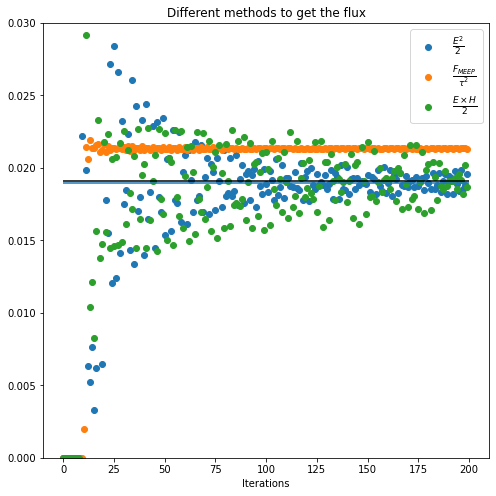

In [46]:
plt.figure(figsize = (8,8))
plt.title('Different methods to get the flux')
plt.scatter(np.arange(N_iter), e2flux_list)
plt.scatter(np.arange(N_iter), np.array(flux_meep)/tau**2)
plt.scatter(np.arange(N_iter), flux_exh)
plt.legend(('$ \\frac{E^2}{2}$', '$ \\frac{F_{MEEP}}{\\tau^2}$', '$ \\frac{E \\times H}{2}$'), fontsize = 13)
plt.xlabel('Iterations')
plt.hlines(np.mean(e2flux_list[25:]),0,200, colors='k')
plt.hlines(np.mean(flux_exh[25:]),0,200)
plt.ylim((0,0.03))

Here are the different fluxes, and the means of the E² and ExH fluxes for values>25. A few things should be noted :
- The E² and ExH fluxes give the same mean value, which makes 
- These mean values differ from Meep's flux computation divided by tau squared, but not by much, why ? 

Let's try a different tau :

In [48]:
sim.reset_meep()
e2flux_list=[]
flux_meep=[]
flux_exh=[]
N_iter = 200
tau = 2
for k in range(N_iter):
    flux = sim.add_flux(fcen, delta_f, N_f, mp.FluxRegion(center=mp.Vector3(0,0,0), size=mp.Vector3(0,2,0)))
    sim.run(until = tau)
    ez_data = sim.get_array(center=mp.Vector3(), size=mp.Vector3(0,2), component=mp.Ez)
    hy_data = sim.get_array(center=mp.Vector3(), size=mp.Vector3(0,2), component=mp.Hy)

    P2 = ez_data*hy_data/2
    flux_E2 = np.sum(ez_data**2/2)
    flux_poynt = np.sum(P2)/2
    e2flux_list.append(flux_E2)
    flux_meep.append(mp.get_fluxes(flux))
    flux_exh.append(flux_poynt)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000334978 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 16
time for set_epsilon = 0.246188 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2.0)

run 3661 finished at t = 2.0 (64 timesteps)


FloatProgress(value=2.0, description='0% done ', max=4.0, min=2.0)

run 3662 finished at t = 4.0 (128 timesteps)


FloatProgress(value=4.0, description='0% done ', max=6.0, min=4.0)

run 3663 finished at t = 6.0 (192 timesteps)


FloatProgress(value=6.0, description='0% done ', max=8.0, min=6.0)

run 3664 finished at t = 8.0 (256 timesteps)


FloatProgress(value=8.0, description='0% done ', max=10.0, min=8.0)

run 3665 finished at t = 10.0 (320 timesteps)


FloatProgress(value=10.0, description='0% done ', max=12.0, min=10.0)

run 3666 finished at t = 12.0 (384 timesteps)


FloatProgress(value=12.0, description='0% done ', max=14.0, min=12.0)

run 3667 finished at t = 14.0 (448 timesteps)


FloatProgress(value=14.0, description='0% done ', max=16.0, min=14.0)

run 3668 finished at t = 16.0 (512 timesteps)


FloatProgress(value=16.0, description='0% done ', max=18.0, min=16.0)

run 3669 finished at t = 18.0 (576 timesteps)


FloatProgress(value=18.0, description='0% done ', max=20.0, min=18.0)

run 3670 finished at t = 20.0 (640 timesteps)


FloatProgress(value=20.0, description='0% done ', max=22.0, min=20.0)

run 3671 finished at t = 22.0 (704 timesteps)


FloatProgress(value=22.0, description='0% done ', max=24.0, min=22.0)

run 3672 finished at t = 24.0 (768 timesteps)


FloatProgress(value=24.0, description='0% done ', max=26.0, min=24.0)

run 3673 finished at t = 26.0 (832 timesteps)


FloatProgress(value=26.0, description='0% done ', max=28.0, min=26.0)

run 3674 finished at t = 28.0 (896 timesteps)


FloatProgress(value=28.0, description='0% done ', max=30.0, min=28.0)

run 3675 finished at t = 30.0 (960 timesteps)


FloatProgress(value=30.0, description='0% done ', max=32.0, min=30.0)

run 3676 finished at t = 32.0 (1024 timesteps)


FloatProgress(value=32.0, description='0% done ', max=34.0, min=32.0)

run 3677 finished at t = 34.0 (1088 timesteps)


FloatProgress(value=34.0, description='0% done ', max=36.0, min=34.0)

run 3678 finished at t = 36.0 (1152 timesteps)


FloatProgress(value=36.0, description='0% done ', max=38.0, min=36.0)

run 3679 finished at t = 38.0 (1216 timesteps)


FloatProgress(value=38.0, description='0% done ', max=40.0, min=38.0)

run 3680 finished at t = 40.0 (1280 timesteps)


FloatProgress(value=40.0, description='0% done ', max=42.0, min=40.0)

run 3681 finished at t = 42.0 (1344 timesteps)


FloatProgress(value=42.0, description='0% done ', max=44.0, min=42.0)

run 3682 finished at t = 44.0 (1408 timesteps)


FloatProgress(value=44.0, description='0% done ', max=46.0, min=44.0)

run 3683 finished at t = 46.0 (1472 timesteps)


FloatProgress(value=46.0, description='0% done ', max=48.0, min=46.0)

run 3684 finished at t = 48.0 (1536 timesteps)


FloatProgress(value=48.0, description='0% done ', max=50.0, min=48.0)

run 3685 finished at t = 50.0 (1600 timesteps)


FloatProgress(value=50.0, description='0% done ', max=52.0, min=50.0)

run 3686 finished at t = 52.0 (1664 timesteps)


FloatProgress(value=52.0, description='0% done ', max=54.0, min=52.0)

run 3687 finished at t = 54.0 (1728 timesteps)


FloatProgress(value=54.0, description='0% done ', max=56.0, min=54.0)

run 3688 finished at t = 56.0 (1792 timesteps)


FloatProgress(value=56.0, description='0% done ', max=58.0, min=56.0)

on time step 1792 (time=56), 0.00223463 s/step
run 3689 finished at t = 58.0 (1856 timesteps)


FloatProgress(value=58.0, description='0% done ', max=60.0, min=58.0)

run 3690 finished at t = 60.0 (1920 timesteps)


FloatProgress(value=60.0, description='0% done ', max=62.0, min=60.0)

run 3691 finished at t = 62.0 (1984 timesteps)


FloatProgress(value=62.0, description='0% done ', max=64.0, min=62.0)

run 3692 finished at t = 64.0 (2048 timesteps)


FloatProgress(value=64.0, description='0% done ', max=66.0, min=64.0)

run 3693 finished at t = 66.0 (2112 timesteps)


FloatProgress(value=66.0, description='0% done ', max=68.0, min=66.0)

run 3694 finished at t = 68.0 (2176 timesteps)


FloatProgress(value=68.0, description='0% done ', max=70.0, min=68.0)

run 3695 finished at t = 70.0 (2240 timesteps)


FloatProgress(value=70.0, description='0% done ', max=72.0, min=70.0)

run 3696 finished at t = 72.0 (2304 timesteps)


FloatProgress(value=72.0, description='0% done ', max=74.0, min=72.0)

run 3697 finished at t = 74.0 (2368 timesteps)


FloatProgress(value=74.0, description='0% done ', max=76.0, min=74.0)

run 3698 finished at t = 76.0 (2432 timesteps)


FloatProgress(value=76.0, description='0% done ', max=78.0, min=76.0)

run 3699 finished at t = 78.0 (2496 timesteps)


FloatProgress(value=78.0, description='0% done ', max=80.0, min=78.0)

run 3700 finished at t = 80.0 (2560 timesteps)


FloatProgress(value=80.0, description='0% done ', max=82.0, min=80.0)

run 3701 finished at t = 82.0 (2624 timesteps)


FloatProgress(value=82.0, description='0% done ', max=84.0, min=82.0)

run 3702 finished at t = 84.0 (2688 timesteps)


FloatProgress(value=84.0, description='0% done ', max=86.0, min=84.0)

run 3703 finished at t = 86.0 (2752 timesteps)


FloatProgress(value=86.0, description='0% done ', max=88.0, min=86.0)

run 3704 finished at t = 88.0 (2816 timesteps)


FloatProgress(value=88.0, description='0% done ', max=90.0, min=88.0)

run 3705 finished at t = 90.0 (2880 timesteps)


FloatProgress(value=90.0, description='0% done ', max=92.0, min=90.0)

run 3706 finished at t = 92.0 (2944 timesteps)


FloatProgress(value=92.0, description='0% done ', max=94.0, min=92.0)

run 3707 finished at t = 94.0 (3008 timesteps)


FloatProgress(value=94.0, description='0% done ', max=96.0, min=94.0)

run 3708 finished at t = 96.0 (3072 timesteps)


FloatProgress(value=96.0, description='0% done ', max=98.0, min=96.0)

run 3709 finished at t = 98.0 (3136 timesteps)


FloatProgress(value=98.0, description='0% done ', min=98.0)

run 3710 finished at t = 100.0 (3200 timesteps)


FloatProgress(value=100.0, description='0% done ', max=102.0, min=100.0)

run 3711 finished at t = 102.0 (3264 timesteps)


FloatProgress(value=102.0, description='0% done ', max=104.0, min=102.0)

run 3712 finished at t = 104.0 (3328 timesteps)


FloatProgress(value=104.0, description='0% done ', max=106.0, min=104.0)

run 3713 finished at t = 106.0 (3392 timesteps)


FloatProgress(value=106.0, description='0% done ', max=108.0, min=106.0)

run 3714 finished at t = 108.0 (3456 timesteps)


FloatProgress(value=108.0, description='0% done ', max=110.0, min=108.0)

run 3715 finished at t = 110.0 (3520 timesteps)


FloatProgress(value=110.0, description='0% done ', max=112.0, min=110.0)

on time step 3553 (time=111.031), 0.00227209 s/step
run 3716 finished at t = 112.0 (3584 timesteps)


FloatProgress(value=112.0, description='0% done ', max=114.0, min=112.0)

run 3717 finished at t = 114.0 (3648 timesteps)


FloatProgress(value=114.0, description='0% done ', max=116.0, min=114.0)

run 3718 finished at t = 116.0 (3712 timesteps)


FloatProgress(value=116.0, description='0% done ', max=118.0, min=116.0)

run 3719 finished at t = 118.0 (3776 timesteps)


FloatProgress(value=118.0, description='0% done ', max=120.0, min=118.0)

run 3720 finished at t = 120.0 (3840 timesteps)


FloatProgress(value=120.0, description='0% done ', max=122.0, min=120.0)

run 3721 finished at t = 122.0 (3904 timesteps)


FloatProgress(value=122.0, description='0% done ', max=124.0, min=122.0)

run 3722 finished at t = 124.0 (3968 timesteps)


FloatProgress(value=124.0, description='0% done ', max=126.0, min=124.0)

run 3723 finished at t = 126.0 (4032 timesteps)


FloatProgress(value=126.0, description='0% done ', max=128.0, min=126.0)

run 3724 finished at t = 128.0 (4096 timesteps)


FloatProgress(value=128.0, description='0% done ', max=130.0, min=128.0)

run 3725 finished at t = 130.0 (4160 timesteps)


FloatProgress(value=130.0, description='0% done ', max=132.0, min=130.0)

run 3726 finished at t = 132.0 (4224 timesteps)


FloatProgress(value=132.0, description='0% done ', max=134.0, min=132.0)

run 3727 finished at t = 134.0 (4288 timesteps)


FloatProgress(value=134.0, description='0% done ', max=136.0, min=134.0)

run 3728 finished at t = 136.0 (4352 timesteps)


FloatProgress(value=136.0, description='0% done ', max=138.0, min=136.0)

run 3729 finished at t = 138.0 (4416 timesteps)


FloatProgress(value=138.0, description='0% done ', max=140.0, min=138.0)

run 3730 finished at t = 140.0 (4480 timesteps)


FloatProgress(value=140.0, description='0% done ', max=142.0, min=140.0)

run 3731 finished at t = 142.0 (4544 timesteps)


FloatProgress(value=142.0, description='0% done ', max=144.0, min=142.0)

run 3732 finished at t = 144.0 (4608 timesteps)


FloatProgress(value=144.0, description='0% done ', max=146.0, min=144.0)

run 3733 finished at t = 146.0 (4672 timesteps)


FloatProgress(value=146.0, description='0% done ', max=148.0, min=146.0)

run 3734 finished at t = 148.0 (4736 timesteps)


FloatProgress(value=148.0, description='0% done ', max=150.0, min=148.0)

run 3735 finished at t = 150.0 (4800 timesteps)


FloatProgress(value=150.0, description='0% done ', max=152.0, min=150.0)

run 3736 finished at t = 152.0 (4864 timesteps)


FloatProgress(value=152.0, description='0% done ', max=154.0, min=152.0)

run 3737 finished at t = 154.0 (4928 timesteps)


FloatProgress(value=154.0, description='0% done ', max=156.0, min=154.0)

run 3738 finished at t = 156.0 (4992 timesteps)


FloatProgress(value=156.0, description='0% done ', max=158.0, min=156.0)

run 3739 finished at t = 158.0 (5056 timesteps)


FloatProgress(value=158.0, description='0% done ', max=160.0, min=158.0)

run 3740 finished at t = 160.0 (5120 timesteps)


FloatProgress(value=160.0, description='0% done ', max=162.0, min=160.0)

run 3741 finished at t = 162.0 (5184 timesteps)


FloatProgress(value=162.0, description='0% done ', max=164.0, min=162.0)

on time step 5210 (time=162.812), 0.00241569 s/step
run 3742 finished at t = 164.0 (5248 timesteps)


FloatProgress(value=164.0, description='0% done ', max=166.0, min=164.0)

run 3743 finished at t = 166.0 (5312 timesteps)


FloatProgress(value=166.0, description='0% done ', max=168.0, min=166.0)

run 3744 finished at t = 168.0 (5376 timesteps)


FloatProgress(value=168.0, description='0% done ', max=170.0, min=168.0)

run 3745 finished at t = 170.0 (5440 timesteps)


FloatProgress(value=170.0, description='0% done ', max=172.0, min=170.0)

run 3746 finished at t = 172.0 (5504 timesteps)


FloatProgress(value=172.0, description='0% done ', max=174.0, min=172.0)

run 3747 finished at t = 174.0 (5568 timesteps)


FloatProgress(value=174.0, description='0% done ', max=176.0, min=174.0)

run 3748 finished at t = 176.0 (5632 timesteps)


FloatProgress(value=176.0, description='0% done ', max=178.0, min=176.0)

run 3749 finished at t = 178.0 (5696 timesteps)


FloatProgress(value=178.0, description='0% done ', max=180.0, min=178.0)

run 3750 finished at t = 180.0 (5760 timesteps)


FloatProgress(value=180.0, description='0% done ', max=182.0, min=180.0)

run 3751 finished at t = 182.0 (5824 timesteps)


FloatProgress(value=182.0, description='0% done ', max=184.0, min=182.0)

run 3752 finished at t = 184.0 (5888 timesteps)


FloatProgress(value=184.0, description='0% done ', max=186.0, min=184.0)

run 3753 finished at t = 186.0 (5952 timesteps)


FloatProgress(value=186.0, description='0% done ', max=188.0, min=186.0)

run 3754 finished at t = 188.0 (6016 timesteps)


FloatProgress(value=188.0, description='0% done ', max=190.0, min=188.0)

run 3755 finished at t = 190.0 (6080 timesteps)


FloatProgress(value=190.0, description='0% done ', max=192.0, min=190.0)

run 3756 finished at t = 192.0 (6144 timesteps)


FloatProgress(value=192.0, description='0% done ', max=194.0, min=192.0)

run 3757 finished at t = 194.0 (6208 timesteps)


FloatProgress(value=194.0, description='0% done ', max=196.0, min=194.0)

run 3758 finished at t = 196.0 (6272 timesteps)


FloatProgress(value=196.0, description='0% done ', max=198.0, min=196.0)

run 3759 finished at t = 198.0 (6336 timesteps)


FloatProgress(value=198.0, description='0% done ', max=200.0, min=198.0)

run 3760 finished at t = 200.0 (6400 timesteps)


FloatProgress(value=200.0, description='0% done ', max=202.0, min=200.0)

run 3761 finished at t = 202.0 (6464 timesteps)


FloatProgress(value=202.0, description='0% done ', max=204.0, min=202.0)

run 3762 finished at t = 204.0 (6528 timesteps)


FloatProgress(value=204.0, description='0% done ', max=206.0, min=204.0)

on time step 6550 (time=204.688), 0.00298549 s/step
run 3763 finished at t = 206.0 (6592 timesteps)


FloatProgress(value=206.0, description='0% done ', max=208.0, min=206.0)

run 3764 finished at t = 208.0 (6656 timesteps)


FloatProgress(value=208.0, description='0% done ', max=210.0, min=208.0)

run 3765 finished at t = 210.0 (6720 timesteps)


FloatProgress(value=210.0, description='0% done ', max=212.0, min=210.0)

run 3766 finished at t = 212.0 (6784 timesteps)


FloatProgress(value=212.0, description='0% done ', max=214.0, min=212.0)

run 3767 finished at t = 214.0 (6848 timesteps)


FloatProgress(value=214.0, description='0% done ', max=216.0, min=214.0)

run 3768 finished at t = 216.0 (6912 timesteps)


FloatProgress(value=216.0, description='0% done ', max=218.0, min=216.0)

run 3769 finished at t = 218.0 (6976 timesteps)


FloatProgress(value=218.0, description='0% done ', max=220.0, min=218.0)

run 3770 finished at t = 220.0 (7040 timesteps)


FloatProgress(value=220.0, description='0% done ', max=222.0, min=220.0)

run 3771 finished at t = 222.0 (7104 timesteps)


FloatProgress(value=222.0, description='0% done ', max=224.0, min=222.0)

run 3772 finished at t = 224.0 (7168 timesteps)


FloatProgress(value=224.0, description='0% done ', max=226.0, min=224.0)

run 3773 finished at t = 226.0 (7232 timesteps)


FloatProgress(value=226.0, description='0% done ', max=228.0, min=226.0)

run 3774 finished at t = 228.0 (7296 timesteps)


FloatProgress(value=228.0, description='0% done ', max=230.0, min=228.0)

run 3775 finished at t = 230.0 (7360 timesteps)


FloatProgress(value=230.0, description='0% done ', max=232.0, min=230.0)

run 3776 finished at t = 232.0 (7424 timesteps)


FloatProgress(value=232.0, description='0% done ', max=234.0, min=232.0)

run 3777 finished at t = 234.0 (7488 timesteps)


FloatProgress(value=234.0, description='0% done ', max=236.0, min=234.0)

run 3778 finished at t = 236.0 (7552 timesteps)


FloatProgress(value=236.0, description='0% done ', max=238.0, min=236.0)

run 3779 finished at t = 238.0 (7616 timesteps)


FloatProgress(value=238.0, description='0% done ', max=240.0, min=238.0)

run 3780 finished at t = 240.0 (7680 timesteps)


FloatProgress(value=240.0, description='0% done ', max=242.0, min=240.0)

run 3781 finished at t = 242.0 (7744 timesteps)


FloatProgress(value=242.0, description='0% done ', max=244.0, min=242.0)

run 3782 finished at t = 244.0 (7808 timesteps)


FloatProgress(value=244.0, description='0% done ', max=246.0, min=244.0)

run 3783 finished at t = 246.0 (7872 timesteps)


FloatProgress(value=246.0, description='0% done ', max=248.0, min=246.0)

on time step 7872 (time=246), 0.00303943 s/step
run 3784 finished at t = 248.0 (7936 timesteps)


FloatProgress(value=248.0, description='0% done ', max=250.0, min=248.0)

run 3785 finished at t = 250.0 (8000 timesteps)


FloatProgress(value=250.0, description='0% done ', max=252.0, min=250.0)

run 3786 finished at t = 252.0 (8064 timesteps)


FloatProgress(value=252.0, description='0% done ', max=254.0, min=252.0)

run 3787 finished at t = 254.0 (8128 timesteps)


FloatProgress(value=254.0, description='0% done ', max=256.0, min=254.0)

run 3788 finished at t = 256.0 (8192 timesteps)


FloatProgress(value=256.0, description='0% done ', max=258.0, min=256.0)

run 3789 finished at t = 258.0 (8256 timesteps)


FloatProgress(value=258.0, description='0% done ', max=260.0, min=258.0)

run 3790 finished at t = 260.0 (8320 timesteps)


FloatProgress(value=260.0, description='0% done ', max=262.0, min=260.0)

run 3791 finished at t = 262.0 (8384 timesteps)


FloatProgress(value=262.0, description='0% done ', max=264.0, min=262.0)

run 3792 finished at t = 264.0 (8448 timesteps)


FloatProgress(value=264.0, description='0% done ', max=266.0, min=264.0)

run 3793 finished at t = 266.0 (8512 timesteps)


FloatProgress(value=266.0, description='0% done ', max=268.0, min=266.0)

run 3794 finished at t = 268.0 (8576 timesteps)


FloatProgress(value=268.0, description='0% done ', max=270.0, min=268.0)

run 3795 finished at t = 270.0 (8640 timesteps)


FloatProgress(value=270.0, description='0% done ', max=272.0, min=270.0)

run 3796 finished at t = 272.0 (8704 timesteps)


FloatProgress(value=272.0, description='0% done ', max=274.0, min=272.0)

run 3797 finished at t = 274.0 (8768 timesteps)


FloatProgress(value=274.0, description='0% done ', max=276.0, min=274.0)

run 3798 finished at t = 276.0 (8832 timesteps)


FloatProgress(value=276.0, description='0% done ', max=278.0, min=276.0)

run 3799 finished at t = 278.0 (8896 timesteps)


FloatProgress(value=278.0, description='0% done ', max=280.0, min=278.0)

run 3800 finished at t = 280.0 (8960 timesteps)


FloatProgress(value=280.0, description='0% done ', max=282.0, min=280.0)

run 3801 finished at t = 282.0 (9024 timesteps)


FloatProgress(value=282.0, description='0% done ', max=284.0, min=282.0)

run 3802 finished at t = 284.0 (9088 timesteps)


FloatProgress(value=284.0, description='0% done ', max=286.0, min=284.0)

run 3803 finished at t = 286.0 (9152 timesteps)


FloatProgress(value=286.0, description='0% done ', max=288.0, min=286.0)

on time step 9168 (time=286.5), 0.00308831 s/step
run 3804 finished at t = 288.0 (9216 timesteps)


FloatProgress(value=288.0, description='0% done ', max=290.0, min=288.0)

run 3805 finished at t = 290.0 (9280 timesteps)


FloatProgress(value=290.0, description='0% done ', max=292.0, min=290.0)

run 3806 finished at t = 292.0 (9344 timesteps)


FloatProgress(value=292.0, description='0% done ', max=294.0, min=292.0)

run 3807 finished at t = 294.0 (9408 timesteps)


FloatProgress(value=294.0, description='0% done ', max=296.0, min=294.0)

run 3808 finished at t = 296.0 (9472 timesteps)


FloatProgress(value=296.0, description='0% done ', max=298.0, min=296.0)

run 3809 finished at t = 298.0 (9536 timesteps)


FloatProgress(value=298.0, description='0% done ', max=300.0, min=298.0)

run 3810 finished at t = 300.0 (9600 timesteps)


FloatProgress(value=300.0, description='0% done ', max=302.0, min=300.0)

run 3811 finished at t = 302.0 (9664 timesteps)


FloatProgress(value=302.0, description='0% done ', max=304.0, min=302.0)

run 3812 finished at t = 304.0 (9728 timesteps)


FloatProgress(value=304.0, description='0% done ', max=306.0, min=304.0)

run 3813 finished at t = 306.0 (9792 timesteps)


FloatProgress(value=306.0, description='0% done ', max=308.0, min=306.0)

run 3814 finished at t = 308.0 (9856 timesteps)


FloatProgress(value=308.0, description='0% done ', max=310.0, min=308.0)

run 3815 finished at t = 310.0 (9920 timesteps)


FloatProgress(value=310.0, description='0% done ', max=312.0, min=310.0)

run 3816 finished at t = 312.0 (9984 timesteps)


FloatProgress(value=312.0, description='0% done ', max=314.0, min=312.0)

run 3817 finished at t = 314.0 (10048 timesteps)


FloatProgress(value=314.0, description='0% done ', max=316.0, min=314.0)

run 3818 finished at t = 316.0 (10112 timesteps)


FloatProgress(value=316.0, description='0% done ', max=318.0, min=316.0)

run 3819 finished at t = 318.0 (10176 timesteps)


FloatProgress(value=318.0, description='0% done ', max=320.0, min=318.0)

run 3820 finished at t = 320.0 (10240 timesteps)


FloatProgress(value=320.0, description='0% done ', max=322.0, min=320.0)

run 3821 finished at t = 322.0 (10304 timesteps)


FloatProgress(value=322.0, description='0% done ', max=324.0, min=322.0)

run 3822 finished at t = 324.0 (10368 timesteps)


FloatProgress(value=324.0, description='0% done ', max=326.0, min=324.0)

run 3823 finished at t = 326.0 (10432 timesteps)


FloatProgress(value=326.0, description='0% done ', max=328.0, min=326.0)

on time step 10459 (time=326.844), 0.00309942 s/step
run 3824 finished at t = 328.0 (10496 timesteps)


FloatProgress(value=328.0, description='0% done ', max=330.0, min=328.0)

run 3825 finished at t = 330.0 (10560 timesteps)


FloatProgress(value=330.0, description='0% done ', max=332.0, min=330.0)

run 3826 finished at t = 332.0 (10624 timesteps)


FloatProgress(value=332.0, description='0% done ', max=334.0, min=332.0)

run 3827 finished at t = 334.0 (10688 timesteps)


FloatProgress(value=334.0, description='0% done ', max=336.0, min=334.0)

run 3828 finished at t = 336.0 (10752 timesteps)


FloatProgress(value=336.0, description='0% done ', max=338.0, min=336.0)

run 3829 finished at t = 338.0 (10816 timesteps)


FloatProgress(value=338.0, description='0% done ', max=340.0, min=338.0)

run 3830 finished at t = 340.0 (10880 timesteps)


FloatProgress(value=340.0, description='0% done ', max=342.0, min=340.0)

run 3831 finished at t = 342.0 (10944 timesteps)


FloatProgress(value=342.0, description='0% done ', max=344.0, min=342.0)

run 3832 finished at t = 344.0 (11008 timesteps)


FloatProgress(value=344.0, description='0% done ', max=346.0, min=344.0)

run 3833 finished at t = 346.0 (11072 timesteps)


FloatProgress(value=346.0, description='0% done ', max=348.0, min=346.0)

run 3834 finished at t = 348.0 (11136 timesteps)


FloatProgress(value=348.0, description='0% done ', max=350.0, min=348.0)

run 3835 finished at t = 350.0 (11200 timesteps)


FloatProgress(value=350.0, description='0% done ', max=352.0, min=350.0)

run 3836 finished at t = 352.0 (11264 timesteps)


FloatProgress(value=352.0, description='0% done ', max=354.0, min=352.0)

run 3837 finished at t = 354.0 (11328 timesteps)


FloatProgress(value=354.0, description='0% done ', max=356.0, min=354.0)

run 3838 finished at t = 356.0 (11392 timesteps)


FloatProgress(value=356.0, description='0% done ', max=358.0, min=356.0)

run 3839 finished at t = 358.0 (11456 timesteps)


FloatProgress(value=358.0, description='0% done ', max=360.0, min=358.0)

run 3840 finished at t = 360.0 (11520 timesteps)


FloatProgress(value=360.0, description='0% done ', max=362.0, min=360.0)

run 3841 finished at t = 362.0 (11584 timesteps)


FloatProgress(value=362.0, description='0% done ', max=364.0, min=362.0)

run 3842 finished at t = 364.0 (11648 timesteps)


FloatProgress(value=364.0, description='0% done ', max=366.0, min=364.0)

on time step 11709 (time=365.906), 0.0032013 s/step
run 3843 finished at t = 366.0 (11712 timesteps)


FloatProgress(value=366.0, description='0% done ', max=368.0, min=366.0)

run 3844 finished at t = 368.0 (11776 timesteps)


FloatProgress(value=368.0, description='0% done ', max=370.0, min=368.0)

run 3845 finished at t = 370.0 (11840 timesteps)


FloatProgress(value=370.0, description='0% done ', max=372.0, min=370.0)

run 3846 finished at t = 372.0 (11904 timesteps)


FloatProgress(value=372.0, description='0% done ', max=374.0, min=372.0)

run 3847 finished at t = 374.0 (11968 timesteps)


FloatProgress(value=374.0, description='0% done ', max=376.0, min=374.0)

run 3848 finished at t = 376.0 (12032 timesteps)


FloatProgress(value=376.0, description='0% done ', max=378.0, min=376.0)

run 3849 finished at t = 378.0 (12096 timesteps)


FloatProgress(value=378.0, description='0% done ', max=380.0, min=378.0)

run 3850 finished at t = 380.0 (12160 timesteps)


FloatProgress(value=380.0, description='0% done ', max=382.0, min=380.0)

run 3851 finished at t = 382.0 (12224 timesteps)


FloatProgress(value=382.0, description='0% done ', max=384.0, min=382.0)

run 3852 finished at t = 384.0 (12288 timesteps)


FloatProgress(value=384.0, description='0% done ', max=386.0, min=384.0)

run 3853 finished at t = 386.0 (12352 timesteps)


FloatProgress(value=386.0, description='0% done ', max=388.0, min=386.0)

run 3854 finished at t = 388.0 (12416 timesteps)


FloatProgress(value=388.0, description='0% done ', max=390.0, min=388.0)

run 3855 finished at t = 390.0 (12480 timesteps)


FloatProgress(value=390.0, description='0% done ', max=392.0, min=390.0)

run 3856 finished at t = 392.0 (12544 timesteps)


FloatProgress(value=392.0, description='0% done ', max=394.0, min=392.0)

run 3857 finished at t = 394.0 (12608 timesteps)


FloatProgress(value=394.0, description='0% done ', max=396.0, min=394.0)

run 3858 finished at t = 396.0 (12672 timesteps)


FloatProgress(value=396.0, description='0% done ', max=398.0, min=396.0)

run 3859 finished at t = 398.0 (12736 timesteps)


FloatProgress(value=398.0, description='0% done ', max=400.0, min=398.0)

on time step 12794 (time=399.812), 0.00368818 s/step
run 3860 finished at t = 400.0 (12800 timesteps)


(0.0, 0.03)

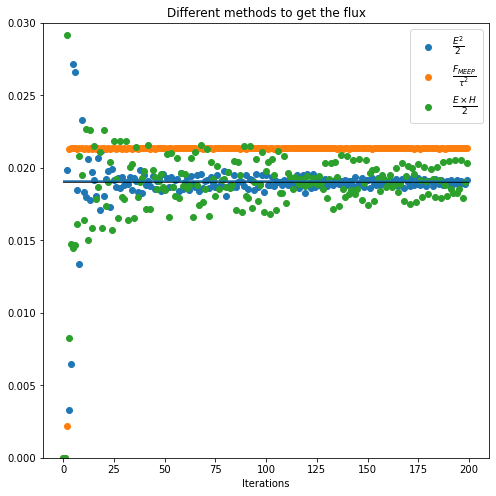

In [49]:
plt.figure(figsize = (8,8))
plt.title('Different methods to get the flux')
plt.scatter(np.arange(N_iter), e2flux_list)
plt.scatter(np.arange(N_iter), np.array(flux_meep)/tau**2)
plt.scatter(np.arange(N_iter), flux_exh)
plt.legend(('$ \\frac{E^2}{2}$', '$ \\frac{F_{MEEP}}{\\tau^2}$', '$ \\frac{E \\times H}{2}$'), fontsize = 13)
plt.xlabel('Iterations')
plt.hlines(np.mean(e2flux_list[25:]),0,200, colors='k')
plt.hlines(np.mean(flux_exh[25:]),0,200)
plt.ylim((0,0.03))

Same thing, the only difference is that the handmade computations of flux have less oscillations.

I have an idea as to why Meep might be off by a tau squared factor in its computation, let's explain it here :

Let's just have a plane wave coming from -x at x=0 : 

$$ \vec{E}(t) = Re(\vec{E_m} e^{j \omega t})$$
$$ \vec{H}(t) = Re(\vec{H_m} e^{j \omega t})$$

The instantaneous Poyting vector writes :
$$\vec{S}(t) = \vec{E}(t) \times \vec{H}(t)$$

It can be shown that :
$$ \langle \vec{S} \rangle = Re(\vec{S_m}))$$
with :
$$ \vec{S_m} = \frac{1}{2}\vec{E_m} \times \vec{H_m^*}$$

MEEP does a Fourier transform of the fields & then Poyting (according to the documentation), giving a Poynting flux spectrum :
$$\vec{S_{MEEP}}(f) = \frac{1}{2} (\int \vec{E_m} e^{j \omega t} e^{- j f t} \mathrm{dt}) \times (\int \vec{H_m^*} e^{j \omega t} e^{- j f t} \mathrm{dt})$$

We only ask MEEP for a single frequency, here $f = \omega$, and this is only my supposition, for some reason, MEEP does the integral over $[0;\tau]$ ($\tau$ being the computation time) :
$$\vec{S_{MEEP}}(f=\omega) = \frac{1}{2} (\int_0^{\tau} \vec{E_m} \mathrm{dt}) \times (\int_0^{\tau} \vec{H_m^*} \mathrm{dt})$$

And because $\vec{E_m}$ and $\vec{H_m}$ are constant in this case (plane wave), we get :
$$\vec{S_{MEEP}}(f=\omega) = \frac{1}{2} \tau^2 \vec{E_m} \times \vec{H_m^*}$$

Hence :
$$\vec{S_{MEEP}}(f=\omega) = \tau^2 \vec{S_m}$$

In [2]:
mp.__version__

'1.16.1'